<a href="https://colab.research.google.com/github/Swayamprakashpatel/IR_Tablet/blob/main/IR_Tablet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVR, SVC
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.neural_network import MLPRegressor, MLPClassifier
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error

In [ ]:
# Assuming you have the dataset in a CSV file named 'data.csv'
df = pd.read_csv('/content/Data.csv')
df = df.drop(['Batch No.',], axis = 1)


In [ ]:
print(y1)

0      0.33
1      0.41
2      0.31
3      0.59
4      0.56
       ... 
859    0.51
860    0.22
861    0.02
862    0.07
863    0.44
Name: Unnamed: 15, Length: 864, dtype: float64


In [ ]:


# Splitting the dataset into features (X) and targets (y)
X = df.iloc[:, 0:9]  # Adjust the column indices as per your dataset
X1 = X.iloc[:, 0:2] # Binder Type and Disintegrant type
X2 = X.iloc[:, 2:4].apply(pd.to_numeric, errors='coerce') / 10 # Disintegrant and binder amount
X3 = X.iloc[:, 4:6].apply(pd.to_numeric, errors='coerce') / 100 # Mannitola and MCC amount
X4 = X.iloc[:, 6:7].apply(pd.to_numeric, errors='coerce') / 20 # Punch Size
X5 = X.iloc[:, 7:8].apply(pd.to_numeric, errors='coerce') / 10 # Compression Force
X6 = X.iloc[:,8:9].apply(pd.to_numeric, errors='coerce') / 1000 # Tablet Weight

y1 = df.iloc[:, 9:10].apply(pd.to_numeric, errors='coerce') / 20  # Output column 1 = Hardness(kg/cm2)
y2 = df.iloc[:, 10:11].apply(pd.to_numeric, errors='coerce') / 10  # Output column 2 = % Friability
y3 = df.iloc[:, 11:12].apply(pd.to_numeric, errors='coerce') / 1000  # Output column 3 = Disin. Time

# Perform one-hot encoding on X1
onehot_encoder = OneHotEncoder(sparse=False, drop='first')
X1_encoded = onehot_encoder.fit_transform(X1)

# Create a DataFrame with the encoded columns
X1_encoded_df = pd.DataFrame(X1_encoded, columns=onehot_encoder.get_feature_names_out(X1.columns))

# Concatenate the encoded columns with the remaining columns in X
X_encoded = pd.concat([X1_encoded_df, X2,X3,X4,X5,X6], axis=1)

# Splitting the data into training and testing sets
X_train, X_test, y1_train, y1_test, y2_train, y2_test, y3_train, y3_test = train_test_split(X_encoded, y1, y2, y3, test_size=0.4, random_state=42)

# Linear Regression for y1
linear_reg_y1 = LinearRegression()
linear_reg_y1.fit(X_train, y1_train)
y1_pred_linear = linear_reg_y1.predict(X_test)
linear_mse_y1 = mean_squared_error(y1_test, y1_pred_linear)

# Linear Regression for y2
linear_reg_y2 = LinearRegression()
linear_reg_y2.fit(X_train, y2_train)
y2_pred_linear = linear_reg_y2.predict(X_test)
linear_mse_y2 = mean_squared_error(y2_test, y2_pred_linear)

# Linear Regression for y3
linear_reg_y3 = LinearRegression()
linear_reg_y3.fit(X_train, y3_train)
y3_pred_linear = linear_reg_y3.predict(X_test)
linear_mse_y3 = mean_squared_error(y3_test, y3_pred_linear)

# Support Vector Machine (SVM) for y1
svm_y1 = SVR()
svm_y1.fit(X_train, y1_train)
y1_pred_svm = svm_y1.predict(X_test)
svm_mse_y1 = mean_squared_error(y1_test, y1_pred_svm)

# Support Vector Machine (SVM) for y2
svm_y2 = SVR()
svm_y2.fit(X_train, y2_train)
y2_pred_svm = svm_y2.predict(X_test)
svm_mse_y2 = mean_squared_error(y2_test, y2_pred_svm)

# Support Vector Machine (SVM) for y3
svm_y3 = SVR()
svm_y3.fit(X_train, y3_train)
y3_pred_svm = svm_y3.predict(X_test)
svm_mse_y3 = mean_squared_error(y3_test, y3_pred_svm)

# k-Nearest Neighbors (k-NN) for y1
knn_y1 = KNeighborsRegressor()
knn_y1.fit(X_train, y1_train)
y1_pred_knn = knn_y1.predict(X_test)
knn_mse_y1 = mean_squared_error(y1_test, y1_pred_knn)

# k-Nearest Neighbors (k-NN) for y2
knn_y2 = KNeighborsRegressor()
knn_y2.fit(X_train, y2_train)
y2_pred_knn = knn_y2.predict(X_test)
knn_mse_y2 = mean_squared_error(y2_test, y2_pred_knn)

# k-Nearest Neighbors (k-NN) for y3
knn_y3 = KNeighborsRegressor()
knn_y3.fit(X_train, y3_train)
y3_pred_knn = knn_y3.predict(X_test)
knn_mse_y3 = mean_squared_error(y3_test, y3_pred_knn)

# Artificial Neural Network (ANN) for y1
from sklearn.metrics import r2_score

# Define custom R-squared metric
def r_squared(y_true, y_pred):
    return 1 - tf.reduce_sum(tf.square(y_true - y_pred)) / tf.reduce_sum(tf.square(y_true - tf.reduce_mean(y_true)))

# Define custom R-squared loss function
def r_squared_loss(y_true, y_pred):
    return -r_squared(y_true, y_pred)

# Define custom callback to monitor validation R-squared and save the best model
class R2Callback(tf.keras.callbacks.Callback):
    def __init__(self, X_val, y_val, filepath, patience=10, delta=0.01):
        super(R2Callback, self).__init__()
        self.X_val = X_val
        self.y_val = y_val
        self.filepath = filepath
        self.patience = patience
        self.delta = delta
        self.best_r2 = -float('inf')
        self.wait = 0

    def on_epoch_end(self, epoch, logs=None):
        y_pred_val = self.model.predict(self.X_val)
        r2_val = r2_score(self.y_val, y_pred_val)
        print(f'Validation R^2: {r2_val}')
        if r2_val - self.best_r2 > self.delta:
            self.best_r2 = r2_val
            self.wait = 0
            self.model.save(self.filepath, overwrite=True)
            print("Model saved with validation R^2:", r2_val)
        else:
            self.wait += 1
            if self.wait >= self.patience:
                self.stopped_epoch = epoch
                self.model.stop_training = True
                print("Early stopping due to no improvement in validation R^2.")

# Define file paths to save the best models for y1, y2, and y3
filepath_y1 = '/content/drive/My Drive/y1.hdf5'
filepath_y2 = '/content/drive/My Drive/y2.hdf5'
filepath_y3 = '/content/drive/My Drive/y3.hdf5'

# Define custom callback to monitor validation R-squared for y1, y2, and y3
r2_callback_y1 = R2Callback(X_test, y1_test, filepath_y1, patience=369, delta=0.01)
r2_callback_y2 = R2Callback(X_test, y2_test, filepath_y2, patience=369, delta=0.01)
r2_callback_y3 = R2Callback(X_test, y3_test, filepath_y3, patience=369, delta=0.01)

# Define and compile ANN model for y1
ann_y1 = tf.keras.Sequential([
    tf.keras.layers.Dense(369, activation='relu', input_shape=(13,)),
    tf.keras.layers.Dense(369, activation='relu'),
    tf.keras.layers.Dense(369, activation='relu'),
    tf.keras.layers.Dense(1, activation='relu')
])

ann_y1.compile(optimizer=tf.keras.optimizers.Adadelta(learning_rate=0.1),
                loss=r_squared_loss,
                metrics=[r_squared])

# Train the ANN model for y1 with the custom callback
hist_y1 = ann_y1.fit(X_train, y1_train, epochs=1000, callbacks=[r2_callback_y1], validation_data=(X_test, y1_test), batch_size=None)

# Load the best model for y1
ann_y1 = tf.keras.models.load_model(filepath_y1, custom_objects={'r_squared': r_squared, 'r_squared_loss': r_squared_loss})

# Predict using the best model for y1
y1_pred_ann = ann_y1.predict(X_test)

# Define and compile ANN model for y2
ann_y2 = tf.keras.Sequential([
    tf.keras.layers.Dense(369, activation='relu', input_shape=(13,)),
    tf.keras.layers.Dense(369, activation='relu'),
    tf.keras.layers.Dense(369, activation='relu'),
    tf.keras.layers.Dense(1, activation='relu')
])

ann_y2.compile(optimizer=tf.keras.optimizers.Adadelta(learning_rate=0.1),
                loss=r_squared_loss,
                metrics=[r_squared])

# Train the ANN model for y2 with the custom callback
hist_y2 = ann_y2.fit(X_train, y2_train, epochs=1000, callbacks=[r2_callback_y2], validation_data=(X_test, y2_test), batch_size=None)

# Load the best model for y2
ann_y2 = tf.keras.models.load_model(filepath_y2, custom_objects={'r_squared': r_squared, 'r_squared_loss': r_squared_loss})

# Predict using the best model for y2
y2_pred_ann = ann_y2.predict(X_test)

# Define and compile ANN model for y3
ann_y3 = tf.keras.Sequential([
    tf.keras.layers.Dense(369, activation='relu', input_shape=(13,)),
    tf.keras.layers.Dense(369, activation='relu'),
    tf.keras.layers.Dense(369, activation='relu'),
    tf.keras.layers.Dense(1, activation='relu')
])

ann_y3.compile(optimizer=tf.keras.optimizers.Adadelta(learning_rate=0.1),
                loss=r_squared_loss,
                metrics=[r_squared])

# Train the ANN model for y3 with the custom callback
hist_y3 = ann_y3.fit(X_train, y3_train, epochs=1000, callbacks=[r2_callback_y3], validation_data=(X_test, y3_test), batch_size=None)

# Load the best model for y3
ann_y3 = tf.keras.models.load_model(filepath_y3, custom_objects={'r_squared': r_squared, 'r_squared_loss': r_squared_loss})

# Predict using the best model for y3
y3_pred_ann = ann_y3.predict(X_test)


from google.colab import files

# Replace 'file_path' with the path to the file you want to download
files.download('/content/drive/My Drive/y1.hdf5')
files.download('/content/drive/My Drive/y2.hdf5')
files.download('/content/drive/My Drive/y3.hdf5')


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), f

Epoch 1/1000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.1895170824900999
Model saved with validation R^2: 0.1895170824900999
17/17 [==============================] - 2s 44ms/step - loss: 0.3433 - r_squared: -0.3241 - val_loss: -0.1338 - val_r_squared: 0.1358
Epoch 2/1000
11/17 [==================>...........] - ETA: 0s - loss: -0.1280 - r_squared: 0.1280

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.1612524134129235
17/17 [==============================] - 0s 27ms/step - loss: -0.1218 - r_squared: 0.0822 - val_loss: -0.1181 - val_r_squared: 0.1208
Epoch 3/1000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.27368450253146137
Model saved with validation R^2: 0.27368450253146137
17/17 [==============================] - 0s 25ms/step - loss: -0.1770 - r_squared: 0.1850 - val_loss: -0.2281 - val_r_squared: 0.2307
Epoch 4/1000
11/17 [==================>...........] - ETA: 0s - loss: -0.2287 - r_squared: 0.2287

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.30598860557871266
Model saved with validation R^2: 0.30598860557871266
17/17 [==============================] - 0s 27ms/step - loss: -0.2025 - r_squared: 0.2218 - val_loss: -0.2667 - val_r_squared: 0.2688
Epoch 5/1000
10/17 [================>.............] - ETA: 0s - loss: -0.2489 - r_squared: 0.2489

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.2696082570497895
17/17 [==============================] - 0s 26ms/step - loss: -0.2584 - r_squared: 0.2563 - val_loss: -0.2155 - val_r_squared: 0.2180
Epoch 6/1000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.23503239324015812
17/17 [==============================] - 0s 28ms/step - loss: -0.3019 - r_squared: 0.2865 - val_loss: -0.1769 - val_r_squared: 0.1793
Epoch 7/1000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.40679938127685866
Model saved with validation R^2: 0.40679938127685866
17/17 [==============================] - 0s 29ms/step - loss: -0.2677 - r_squared: 0.2671 - val_loss: -0.3739 - val_r_squared: 0.3758
Epoch 8/1000
13/17 [=====================>........] - ETA: 0s - loss: -0.3480 - r_squared: 0.3480

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.4128471580343077
17/17 [==============================] - 0s 25ms/step - loss: -0.3647 - r_squared: 0.3747 - val_loss: -0.3745 - val_r_squared: 0.3773
Epoch 9/1000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.4505250609866571
Model saved with validation R^2: 0.4505250609866571
17/17 [==============================] - 0s 28ms/step - loss: -0.3907 - r_squared: 0.3887 - val_loss: -0.4228 - val_r_squared: 0.4258
Epoch 10/1000
11/17 [==================>...........] - ETA: 0s - loss: -0.4428 - r_squared: 0.4428

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.48751041350559476
Model saved with validation R^2: 0.48751041350559476
17/17 [==============================] - 0s 30ms/step - loss: -0.4219 - r_squared: 0.4184 - val_loss: -0.4548 - val_r_squared: 0.4582
Epoch 11/1000
11/17 [==================>...........] - ETA: 0s - loss: -0.4928 - r_squared: 0.4928

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 5ms/step
Validation R^2: 0.11045864439962827
17/17 [==============================] - 0s 25ms/step - loss: -0.4666 - r_squared: 0.4635 - val_loss: -0.0325 - val_r_squared: 0.0375
Epoch 12/1000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.41625082900780663
17/17 [==============================] - 0s 25ms/step - loss: -0.4918 - r_squared: 0.4772 - val_loss: -0.3719 - val_r_squared: 0.3754
Epoch 13/1000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.35372135647206193
17/17 [==============================] - 0s 23ms/step - loss: -0.5070 - r_squared: 0.5107 - val_loss: -0.3251 - val_r_squared: 0.3278
Epoch 14/1000
11/11 [==============================] - 0s 3ms/step
Validation R^2: -0.5779852106198755
17/17 [==============================] - 0s 27ms/step - loss: -0.4954 - r_squared: 0.4192 - val_loss: 0.7250 - val_r_squared: -0.7207
Epoch 15/1000
11/11 [==============================] - 0s 3ms/step

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 4ms/step
Validation R^2: -0.4866031762933467
17/17 [==============================] - 0s 26ms/step - loss: -0.5942 - r_squared: 0.5853 - val_loss: 0.5622 - val_r_squared: -0.5569
Epoch 18/1000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.5631999283037292
17/17 [==============================] - 0s 25ms/step - loss: -0.5532 - r_squared: 0.5549 - val_loss: -0.5265 - val_r_squared: 0.5301
Epoch 19/1000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.5938368773403335
17/17 [==============================] - 0s 25ms/step - loss: -0.6081 - r_squared: 0.6080 - val_loss: -0.5618 - val_r_squared: 0.5651
Epoch 20/1000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.6041697655149474
Model saved with validation R^2: 0.6041697655149474
17/17 [==============================] - 0s 27ms/step - loss: -0.6228 - r_squared: 0.6297 - val_loss: -0.5776 - val_r_squared: 0.5806
Epoch 21/1000
11/

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 6ms/step
Validation R^2: 0.6235916544929709
Model saved with validation R^2: 0.6235916544929709
17/17 [==============================] - 1s 43ms/step - loss: -0.6293 - r_squared: 0.6267 - val_loss: -0.6002 - val_r_squared: 0.6036
Epoch 22/1000
 4/17 [======>.......................] - ETA: 0s - loss: -0.6333 - r_squared: 0.6333

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 6ms/step
Validation R^2: 0.48931226531067873
17/17 [==============================] - 1s 43ms/step - loss: -0.6246 - r_squared: 0.6303 - val_loss: -0.4451 - val_r_squared: 0.4474
Epoch 23/1000
11/11 [==============================] - 0s 5ms/step
Validation R^2: 0.6107521416061439
17/17 [==============================] - 1s 41ms/step - loss: -0.6496 - r_squared: 0.6550 - val_loss: -0.5886 - val_r_squared: 0.5911
Epoch 24/1000
11/11 [==============================] - 0s 6ms/step
Validation R^2: 0.5155141968489084
17/17 [==============================] - 1s 46ms/step - loss: -0.6352 - r_squared: 0.6245 - val_loss: -0.4666 - val_r_squared: 0.4704
Epoch 25/1000
11/11 [==============================] - 0s 5ms/step
Validation R^2: 0.6501653175832387
Model saved with validation R^2: 0.6501653175832387
17/17 [==============================] - 1s 42ms/step - loss: -0.6627 - r_squared: 0.6713 - val_loss: -0.6288 - val_r_squared: 0.6317
Epoch 26/1000
 7/

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.6082079279967121
17/17 [==============================] - 1s 31ms/step - loss: -0.6753 - r_squared: 0.6654 - val_loss: -0.5822 - val_r_squared: 0.5855
Epoch 27/1000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.6158268501436774
17/17 [==============================] - 0s 25ms/step - loss: -0.6679 - r_squared: 0.6601 - val_loss: -0.5802 - val_r_squared: 0.5835
Epoch 28/1000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.4369370849675738
17/17 [==============================] - 0s 26ms/step - loss: -0.6821 - r_squared: 0.6670 - val_loss: -0.3798 - val_r_squared: 0.3836
Epoch 29/1000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.5855217480040011
17/17 [==============================] - 0s 23ms/step - loss: -0.6944 - r_squared: 0.6821 - val_loss: -0.5500 - val_r_squared: 0.5534
Epoch 30/1000
11/11 [==============================] - 0s 3ms/step
Val

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.6018672688213103
17/17 [==============================] - 0s 24ms/step - loss: -0.7296 - r_squared: 0.7375 - val_loss: -0.5843 - val_r_squared: 0.5867
Epoch 36/1000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.5351543400022805
17/17 [==============================] - 0s 26ms/step - loss: -0.7063 - r_squared: 0.6931 - val_loss: -0.4938 - val_r_squared: 0.4969
Epoch 37/1000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.019133252015983926
17/17 [==============================] - 0s 27ms/step - loss: -0.7290 - r_squared: 0.7052 - val_loss: 0.0842 - val_r_squared: -0.0790
Epoch 38/1000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.6195666959741645
17/17 [==============================] - 0s 22ms/step - loss: -0.6932 - r_squared: 0.6898 - val_loss: -0.6006 - val_r_squared: 0.6032
Epoch 39/1000
11/11 [==============================] - 0s 4ms/step
V

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 4ms/step
Validation R^2: -0.543643781878361
17/17 [==============================] - 0s 25ms/step - loss: -0.7452 - r_squared: 0.7135 - val_loss: 0.6223 - val_r_squared: -0.6159
Epoch 49/1000
11/11 [==============================] - 0s 6ms/step
Validation R^2: 0.6896965923077238
17/17 [==============================] - 1s 31ms/step - loss: -0.6942 - r_squared: 0.6949 - val_loss: -0.6633 - val_r_squared: 0.6659
Epoch 50/1000
11/11 [==============================] - 0s 9ms/step
Validation R^2: 0.731387095223201
17/17 [==============================] - 1s 48ms/step - loss: -0.7879 - r_squared: 0.7962 - val_loss: -0.7109 - val_r_squared: 0.7133
Epoch 51/1000
11/11 [==============================] - 0s 6ms/step
Validation R^2: 0.43300110409041725
17/17 [==============================] - 1s 43ms/step - loss: -0.7832 - r_squared: 0.7574 - val_loss: -0.3997 - val_r_squared: 0.4028
Epoch 52/1000
11/11 [==============================] - 0s 6ms/step
Val

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.7451335570623134
17/17 [==============================] - 0s 28ms/step - loss: -0.8233 - r_squared: 0.8068 - val_loss: -0.7284 - val_r_squared: 0.7304
Epoch 62/1000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.7455605017210745
17/17 [==============================] - 0s 25ms/step - loss: -0.8242 - r_squared: 0.8279 - val_loss: -0.7289 - val_r_squared: 0.7310
Epoch 63/1000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.7511545258540263
17/17 [==============================] - 0s 25ms/step - loss: -0.8228 - r_squared: 0.8097 - val_loss: -0.7339 - val_r_squared: 0.7359
Epoch 64/1000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.6419449539944946
17/17 [==============================] - 0s 25ms/step - loss: -0.8183 - r_squared: 0.8191 - val_loss: -0.6262 - val_r_squared: 0.6281
Epoch 65/1000
11/11 [==============================] - 0s 4ms/step
Val

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.4440744482778476
17/17 [==============================] - 0s 27ms/step - loss: -0.8495 - r_squared: 0.7775 - val_loss: -0.3969 - val_r_squared: 0.4001
Epoch 85/1000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.7638745163492824
17/17 [==============================] - 0s 25ms/step - loss: -0.8334 - r_squared: 0.8359 - val_loss: -0.7521 - val_r_squared: 0.7534
Epoch 86/1000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.7839648164629951
Model saved with validation R^2: 0.7839648164629951
17/17 [==============================] - 0s 30ms/step - loss: -0.8684 - r_squared: 0.8726 - val_loss: -0.7702 - val_r_squared: 0.7717
Epoch 87/1000
11/17 [==================>...........] - ETA: 0s - loss: -0.8812 - r_squared: 0.8812

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.6149321980859663
17/17 [==============================] - 0s 27ms/step - loss: -0.8684 - r_squared: 0.8669 - val_loss: -0.5983 - val_r_squared: 0.6001
Epoch 88/1000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.7554177853588082
17/17 [==============================] - 0s 24ms/step - loss: -0.8691 - r_squared: 0.8721 - val_loss: -0.7358 - val_r_squared: 0.7373
Epoch 89/1000
11/11 [==============================] - 0s 5ms/step
Validation R^2: 0.7783358587202143
17/17 [==============================] - 0s 27ms/step - loss: -0.8723 - r_squared: 0.8767 - val_loss: -0.7661 - val_r_squared: 0.7675
Epoch 90/1000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.7339697330436088
17/17 [==============================] - 0s 25ms/step - loss: -0.8690 - r_squared: 0.8654 - val_loss: -0.7113 - val_r_squared: 0.7127
Epoch 91/1000
11/11 [==============================] - 0s 5ms/step
Val

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 5ms/step
Validation R^2: 0.7933296260795543
17/17 [==============================] - 1s 37ms/step - loss: -0.8639 - r_squared: 0.8656 - val_loss: -0.7825 - val_r_squared: 0.7838
Epoch 107/1000
11/11 [==============================] - 0s 7ms/step
Validation R^2: 0.49769436973997283
17/17 [==============================] - 1s 39ms/step - loss: -0.8882 - r_squared: 0.8818 - val_loss: -0.4773 - val_r_squared: 0.4788
Epoch 108/1000
11/11 [==============================] - 0s 5ms/step
Validation R^2: 0.7933687540482655
17/17 [==============================] - 1s 42ms/step - loss: -0.8218 - r_squared: 0.8239 - val_loss: -0.7794 - val_r_squared: 0.7808
Epoch 109/1000
11/11 [==============================] - 0s 6ms/step
Validation R^2: 0.7127600195493528
17/17 [==============================] - 1s 42ms/step - loss: -0.8918 - r_squared: 0.8857 - val_loss: -0.6874 - val_r_squared: 0.6891
Epoch 110/1000
11/11 [==============================] - 0s 3ms/ste

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.7080464083072961
17/17 [==============================] - 0s 28ms/step - loss: -0.8887 - r_squared: 0.8778 - val_loss: -0.6841 - val_r_squared: 0.6858
Epoch 123/1000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.7366752657526751
17/17 [==============================] - 0s 25ms/step - loss: -0.8425 - r_squared: 0.8443 - val_loss: -0.7248 - val_r_squared: 0.7258
Epoch 124/1000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.6707970537716623
17/17 [==============================] - 0s 27ms/step - loss: -0.8863 - r_squared: 0.8877 - val_loss: -0.6568 - val_r_squared: 0.6578
Epoch 125/1000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.6839812532582517
17/17 [==============================] - 0s 26ms/step - loss: -0.8885 - r_squared: 0.8866 - val_loss: -0.6725 - val_r_squared: 0.6740
Epoch 126/1000
11/11 [==============================] - 0s 4ms/step

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.8285495340090301
17/17 [==============================] - 1s 30ms/step - loss: -0.9328 - r_squared: 0.9355 - val_loss: -0.8171 - val_r_squared: 0.8180
Epoch 139/1000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.8230205866039745
17/17 [==============================] - 0s 27ms/step - loss: -0.9200 - r_squared: 0.9171 - val_loss: -0.8120 - val_r_squared: 0.8128
Epoch 140/1000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.8257696708325045
17/17 [==============================] - 0s 28ms/step - loss: -0.9239 - r_squared: 0.9263 - val_loss: -0.8136 - val_r_squared: 0.8143
Epoch 141/1000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.8199445471195386
17/17 [==============================] - 0s 26ms/step - loss: -0.8924 - r_squared: 0.8937 - val_loss: -0.8062 - val_r_squared: 0.8071
Epoch 142/1000
11/11 [==============================] - 0s 4ms/step

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.8247619872931995
17/17 [==============================] - 0s 26ms/step - loss: -0.9460 - r_squared: 0.9456 - val_loss: -0.8159 - val_r_squared: 0.8168
Epoch 176/1000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.837227704576376
17/17 [==============================] - 0s 28ms/step - loss: -0.9268 - r_squared: 0.9277 - val_loss: -0.8256 - val_r_squared: 0.8263
Epoch 177/1000
11/11 [==============================] - 0s 4ms/step
Validation R^2: -0.3012776214009294
17/17 [==============================] - 0s 25ms/step - loss: -0.8930 - r_squared: 0.8748 - val_loss: 0.3711 - val_r_squared: -0.3661
Epoch 178/1000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.8428094940716252
17/17 [==============================] - 0s 26ms/step - loss: -0.8341 - r_squared: 0.8376 - val_loss: -0.8310 - val_r_squared: 0.8317
Epoch 179/1000
11/11 [==============================] - 0s 3ms/step

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.8299861315175909
17/17 [==============================] - 0s 29ms/step - loss: -0.9252 - r_squared: 0.9267 - val_loss: -0.8211 - val_r_squared: 0.8219
Epoch 200/1000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.8397628425643173
17/17 [==============================] - 0s 26ms/step - loss: -0.8983 - r_squared: 0.9029 - val_loss: -0.8268 - val_r_squared: 0.8275
Epoch 201/1000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.8127221903151015
17/17 [==============================] - 0s 27ms/step - loss: -0.9328 - r_squared: 0.9338 - val_loss: -0.7964 - val_r_squared: 0.7969
Epoch 202/1000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.6354495095588255
17/17 [==============================] - 0s 27ms/step - loss: -0.9126 - r_squared: 0.9113 - val_loss: -0.6215 - val_r_squared: 0.6229
Epoch 203/1000
11/11 [==============================] - 0s 4ms/step

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.821704058438903
17/17 [==============================] - 0s 28ms/step - loss: -0.9638 - r_squared: 0.9631 - val_loss: -0.8062 - val_r_squared: 0.8070
Epoch 259/1000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.7209086486806163
17/17 [==============================] - 0s 27ms/step - loss: -0.9294 - r_squared: 0.9292 - val_loss: -0.7079 - val_r_squared: 0.7087
Epoch 260/1000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.8374052311753726
17/17 [==============================] - 0s 26ms/step - loss: -0.9247 - r_squared: 0.9258 - val_loss: -0.8309 - val_r_squared: 0.8315
Epoch 261/1000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.6895658747952871
17/17 [==============================] - 0s 26ms/step - loss: -0.9709 - r_squared: 0.9694 - val_loss: -0.6769 - val_r_squared: 0.6781
Epoch 262/1000
11/11 [==============================] - 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 8ms/step
Validation R^2: 0.8520657794249786
17/17 [==============================] - 1s 45ms/step - loss: -0.9845 - r_squared: 0.9842 - val_loss: -0.8374 - val_r_squared: 0.8381
Epoch 382/1000
11/11 [==============================] - 0s 5ms/step
Validation R^2: 0.8665741557413618
17/17 [==============================] - 1s 39ms/step - loss: -0.9706 - r_squared: 0.9713 - val_loss: -0.8546 - val_r_squared: 0.8553
Epoch 383/1000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.8374577125164955
17/17 [==============================] - 1s 38ms/step - loss: -0.9683 - r_squared: 0.9688 - val_loss: -0.8225 - val_r_squared: 0.8234
Epoch 384/1000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.7858227800847448
17/17 [==============================] - 0s 24ms/step - loss: -0.9704 - r_squared: 0.9640 - val_loss: -0.7744 - val_r_squared: 0.7754
Epoch 385/1000
11/11 [==============================] - 0s 3ms/step

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.06875218122429994
Model saved with validation R^2: 0.06875218122429994
17/17 [==============================] - 1s 31ms/step - loss: -0.1284 - r_squared: 0.1278 - val_loss: 0.1057 - val_r_squared: -0.1052
Epoch 3/1000
11/17 [==================>...........] - ETA: 0s - loss: -0.1273 - r_squared: 0.1273

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.18795772358684693
Model saved with validation R^2: 0.18795772358684693
17/17 [==============================] - 1s 30ms/step - loss: -0.1103 - r_squared: 0.0980 - val_loss: -0.1746 - val_r_squared: 0.1781
Epoch 4/1000
11/17 [==================>...........] - ETA: 0s - loss: -0.2599 - r_squared: 0.2599

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.34263411335606375
Model saved with validation R^2: 0.34263411335606375
17/17 [==============================] - 0s 30ms/step - loss: -0.2837 - r_squared: 0.2746 - val_loss: -0.2969 - val_r_squared: 0.2986
Epoch 5/1000
11/17 [==================>...........] - ETA: 0s - loss: -0.3610 - r_squared: 0.3610

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 6ms/step
Validation R^2: 0.398175267406917
Model saved with validation R^2: 0.398175267406917
17/17 [==============================] - 1s 38ms/step - loss: -0.3620 - r_squared: 0.3634 - val_loss: -0.3878 - val_r_squared: 0.3905
Epoch 6/1000
 6/17 [=========>....................] - ETA: 0s - loss: -0.3268 - r_squared: 0.3268

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 7ms/step
Validation R^2: 0.42005401650311036
Model saved with validation R^2: 0.42005401650311036
17/17 [==============================] - 1s 43ms/step - loss: -0.3681 - r_squared: 0.3702 - val_loss: -0.3847 - val_r_squared: 0.3871
Epoch 7/1000
 7/17 [===========>..................] - ETA: 0s - loss: -0.4113 - r_squared: 0.4113

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 7ms/step
Validation R^2: 0.1944489134777151
17/17 [==============================] - 1s 39ms/step - loss: -0.3480 - r_squared: 0.2208 - val_loss: -0.0079 - val_r_squared: 0.0067
Epoch 8/1000
11/11 [==============================] - 0s 6ms/step
Validation R^2: -0.9885233519327039
17/17 [==============================] - 1s 48ms/step - loss: -0.1188 - r_squared: -0.6476 - val_loss: 1.2709 - val_r_squared: -1.2812
Epoch 9/1000
11/11 [==============================] - 0s 6ms/step
Validation R^2: -0.12784280402893788
17/17 [==============================] - 1s 42ms/step - loss: 0.9423 - r_squared: -0.9731 - val_loss: 0.2365 - val_r_squared: -0.2389
Epoch 10/1000
11/11 [==============================] - 0s 6ms/step
Validation R^2: 0.4082423407741238
17/17 [==============================] - 1s 44ms/step - loss: -0.2426 - r_squared: 0.2620 - val_loss: -0.3877 - val_r_squared: 0.3908
Epoch 11/1000
11/11 [==============================] - 0s 4ms/step
V

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.18561112881110398
17/17 [==============================] - 0s 26ms/step - loss: -0.3962 - r_squared: 0.0762 - val_loss: -0.1370 - val_r_squared: 0.1415
Epoch 14/1000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.4522790772889923
17/17 [==============================] - 0s 26ms/step - loss: -0.3464 - r_squared: 0.3452 - val_loss: -0.4479 - val_r_squared: 0.4512
Epoch 15/1000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.46027855251143523
17/17 [==============================] - 0s 27ms/step - loss: -0.4923 - r_squared: 0.4865 - val_loss: -0.4647 - val_r_squared: 0.4681
Epoch 16/1000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.46847926477597834
17/17 [==============================] - 0s 24ms/step - loss: -0.5152 - r_squared: 0.5135 - val_loss: -0.4674 - val_r_squared: 0.4706
Epoch 17/1000
11/11 [==============================] - 0s 4ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.3387632508985142
17/17 [==============================] - 0s 24ms/step - loss: -0.5472 - r_squared: 0.5194 - val_loss: -0.3116 - val_r_squared: 0.3158
Epoch 19/1000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.48372876431175615
17/17 [==============================] - 0s 26ms/step - loss: -0.3645 - r_squared: 0.3659 - val_loss: -0.4760 - val_r_squared: 0.4785
Epoch 20/1000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.49856776057488705
Model saved with validation R^2: 0.49856776057488705
17/17 [==============================] - 0s 27ms/step - loss: -0.5518 - r_squared: 0.5468 - val_loss: -0.4972 - val_r_squared: 0.5002
Epoch 21/1000
11/17 [==================>...........] - ETA: 0s - loss: -0.5697 - r_squared: 0.5697

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.4995458871145537
17/17 [==============================] - 0s 29ms/step - loss: -0.5652 - r_squared: 0.5696 - val_loss: -0.4958 - val_r_squared: 0.4990
Epoch 22/1000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.46498472197482354
17/17 [==============================] - 1s 30ms/step - loss: -0.5410 - r_squared: 0.5389 - val_loss: -0.4109 - val_r_squared: 0.4122
Epoch 23/1000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.5063069236117275
17/17 [==============================] - 0s 27ms/step - loss: -0.5639 - r_squared: 0.5723 - val_loss: -0.4972 - val_r_squared: 0.5004
Epoch 24/1000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.24739820330718776
17/17 [==============================] - 0s 27ms/step - loss: -0.5399 - r_squared: 0.4922 - val_loss: -0.0513 - val_r_squared: 0.0487
Epoch 25/1000
11/11 [==============================] - 0s 4ms/step
V

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.41304887363308884
17/17 [==============================] - 0s 26ms/step - loss: -0.5896 - r_squared: 0.5980 - val_loss: -0.3852 - val_r_squared: 0.3892
Epoch 27/1000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.5308569318531522
17/17 [==============================] - 0s 25ms/step - loss: -0.5968 - r_squared: 0.6007 - val_loss: -0.5171 - val_r_squared: 0.5198
Epoch 28/1000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.5294493887568931
17/17 [==============================] - 0s 26ms/step - loss: -0.6170 - r_squared: 0.6180 - val_loss: -0.5181 - val_r_squared: 0.5210
Epoch 29/1000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.47210386462847387
17/17 [==============================] - 0s 25ms/step - loss: -0.6119 - r_squared: 0.5991 - val_loss: -0.3934 - val_r_squared: 0.3940
Epoch 30/1000
11/11 [==============================] - 0s 4ms/step
V

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.5609667320372025
17/17 [==============================] - 0s 25ms/step - loss: -0.5910 - r_squared: 0.5701 - val_loss: -0.5427 - val_r_squared: 0.5444
Epoch 41/1000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.5655611429106229
17/17 [==============================] - 0s 26ms/step - loss: -0.6133 - r_squared: 0.6155 - val_loss: -0.5485 - val_r_squared: 0.5502
Epoch 42/1000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.5506151523366415
17/17 [==============================] - 0s 27ms/step - loss: -0.6677 - r_squared: 0.6809 - val_loss: -0.5324 - val_r_squared: 0.5345
Epoch 43/1000
11/11 [==============================] - 0s 7ms/step
Validation R^2: 0.515303179849711
17/17 [==============================] - 1s 35ms/step - loss: -0.6402 - r_squared: 0.5932 - val_loss: -0.4948 - val_r_squared: 0.4976
Epoch 44/1000
11/11 [==============================] - 0s 6ms/step
Vali

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.0827003793883494
17/17 [==============================] - 0s 26ms/step - loss: -0.6119 - r_squared: 0.5515 - val_loss: 0.0423 - val_r_squared: -0.0390
Epoch 52/1000
11/11 [==============================] - 0s 4ms/step
Validation R^2: -0.11335249095768773
17/17 [==============================] - 0s 27ms/step - loss: -0.5945 - r_squared: 0.5100 - val_loss: 0.2942 - val_r_squared: -0.2941
Epoch 53/1000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.541417972885299
17/17 [==============================] - 0s 25ms/step - loss: -0.4908 - r_squared: 0.5025 - val_loss: -0.4678 - val_r_squared: 0.4674
Epoch 54/1000
11/11 [==============================] - 0s 8ms/step
Validation R^2: 0.5881402045243159
17/17 [==============================] - 1s 42ms/step - loss: -0.4401 - r_squared: 0.4535 - val_loss: -0.5622 - val_r_squared: 0.5635
Epoch 55/1000
11/11 [==============================] - 0s 14ms/step
V

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 8ms/step
Validation R^2: 0.5426283679456139
17/17 [==============================] - 1s 74ms/step - loss: -0.7137 - r_squared: 0.7159 - val_loss: -0.4668 - val_r_squared: 0.4652
Epoch 63/1000
11/11 [==============================] - 0s 11ms/step
Validation R^2: 0.4515224295333744
17/17 [==============================] - 1s 49ms/step - loss: -0.6312 - r_squared: 0.6058 - val_loss: -0.4106 - val_r_squared: 0.4147
Epoch 64/1000
11/11 [==============================] - 0s 11ms/step
Validation R^2: 0.6040541574224593
17/17 [==============================] - 1s 64ms/step - loss: -0.6225 - r_squared: 0.6196 - val_loss: -0.5828 - val_r_squared: 0.5842
Epoch 65/1000
11/11 [==============================] - 0s 9ms/step
Validation R^2: 0.6130791826755279
17/17 [==============================] - 1s 71ms/step - loss: -0.6184 - r_squared: 0.6182 - val_loss: -0.5898 - val_r_squared: 0.5907
Epoch 66/1000
11/11 [==============================] - 0s 8ms/step
V

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.5923524790205823
17/17 [==============================] - 1s 54ms/step - loss: -0.7228 - r_squared: 0.7192 - val_loss: -0.5317 - val_r_squared: 0.5292
Epoch 77/1000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.6309526834473184
17/17 [==============================] - 0s 27ms/step - loss: -0.7461 - r_squared: 0.7364 - val_loss: -0.6055 - val_r_squared: 0.6050
Epoch 78/1000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.48923221284232565
17/17 [==============================] - 0s 27ms/step - loss: -0.7468 - r_squared: 0.6803 - val_loss: -0.4606 - val_r_squared: 0.4634
Epoch 79/1000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.6261106766423208
17/17 [==============================] - 0s 25ms/step - loss: -0.7140 - r_squared: 0.6967 - val_loss: -0.6072 - val_r_squared: 0.6079
Epoch 80/1000
11/11 [==============================] - 0s 4ms/step
Va

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 7ms/step
Validation R^2: 0.6416583412254053
17/17 [==============================] - 1s 42ms/step - loss: -0.7338 - r_squared: 0.7367 - val_loss: -0.6188 - val_r_squared: 0.6191
Epoch 90/1000
11/11 [==============================] - 0s 5ms/step
Validation R^2: 0.6462555261314668
17/17 [==============================] - 1s 43ms/step - loss: -0.7813 - r_squared: 0.7885 - val_loss: -0.6198 - val_r_squared: 0.6199
Epoch 91/1000
11/11 [==============================] - 0s 8ms/step
Validation R^2: 0.46032236086428613
17/17 [==============================] - 1s 40ms/step - loss: -0.7519 - r_squared: 0.7061 - val_loss: -0.3962 - val_r_squared: 0.3995
Epoch 92/1000
11/11 [==============================] - 0s 7ms/step
Validation R^2: 0.638425936680647
17/17 [==============================] - 1s 44ms/step - loss: -0.7430 - r_squared: 0.7485 - val_loss: -0.6055 - val_r_squared: 0.6053
Epoch 93/1000
11/11 [==============================] - 0s 7ms/step
Val

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.6479382764943123
17/17 [==============================] - 0s 26ms/step - loss: -0.7219 - r_squared: 0.7179 - val_loss: -0.6218 - val_r_squared: 0.6223
Epoch 105/1000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.6651523627644615
17/17 [==============================] - 0s 27ms/step - loss: -0.7615 - r_squared: 0.7690 - val_loss: -0.6421 - val_r_squared: 0.6424
Epoch 106/1000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.6661997685272074
Model saved with validation R^2: 0.6661997685272074
17/17 [==============================] - 0s 30ms/step - loss: -0.7870 - r_squared: 0.7858 - val_loss: -0.6371 - val_r_squared: 0.6373
Epoch 107/1000
12/17 [====================>.........] - ETA: 0s - loss: -0.7818 - r_squared: 0.7818

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.3132417304196996
17/17 [==============================] - 0s 25ms/step - loss: -0.7726 - r_squared: 0.7024 - val_loss: -0.2065 - val_r_squared: 0.2093
Epoch 108/1000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.6544344480842696
17/17 [==============================] - 0s 25ms/step - loss: -0.7258 - r_squared: 0.7364 - val_loss: -0.6277 - val_r_squared: 0.6275
Epoch 109/1000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.6626931404402396
17/17 [==============================] - 0s 27ms/step - loss: -0.8054 - r_squared: 0.8112 - val_loss: -0.6375 - val_r_squared: 0.6375
Epoch 110/1000
11/11 [==============================] - 0s 5ms/step
Validation R^2: 0.6497123109759968
17/17 [==============================] - 0s 25ms/step - loss: -0.7744 - r_squared: 0.7640 - val_loss: -0.6146 - val_r_squared: 0.6135
Epoch 111/1000
11/11 [==============================] - 0s 4ms/step

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.6598175279533172
17/17 [==============================] - 0s 26ms/step - loss: -0.8218 - r_squared: 0.8286 - val_loss: -0.6137 - val_r_squared: 0.6126
Epoch 128/1000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.681809158019089
17/17 [==============================] - 0s 28ms/step - loss: -0.8254 - r_squared: 0.8315 - val_loss: -0.6553 - val_r_squared: 0.6548
Epoch 129/1000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.6442523448000131
17/17 [==============================] - 0s 28ms/step - loss: -0.8092 - r_squared: 0.7622 - val_loss: -0.5948 - val_r_squared: 0.5961
Epoch 130/1000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.6809910267893937
17/17 [==============================] - 0s 25ms/step - loss: -0.7854 - r_squared: 0.7912 - val_loss: -0.6574 - val_r_squared: 0.6574
Epoch 131/1000
11/11 [==============================] - 0s 4ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.6752594670969102
17/17 [==============================] - 0s 27ms/step - loss: -0.7764 - r_squared: 0.7851 - val_loss: -0.6380 - val_r_squared: 0.6361
Epoch 151/1000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.4886866838121956
17/17 [==============================] - 0s 27ms/step - loss: -0.8452 - r_squared: 0.8304 - val_loss: -0.4168 - val_r_squared: 0.4196
Epoch 152/1000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.5781063735387633
17/17 [==============================] - 0s 30ms/step - loss: -0.8325 - r_squared: 0.8307 - val_loss: -0.5395 - val_r_squared: 0.5414
Epoch 153/1000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.4144602066793801
17/17 [==============================] - 0s 28ms/step - loss: -0.8433 - r_squared: 0.8328 - val_loss: -0.3198 - val_r_squared: 0.3212
Epoch 154/1000
11/11 [==============================] - 0s 4ms/step

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.6650895456178951
17/17 [==============================] - 0s 25ms/step - loss: -0.8569 - r_squared: 0.8528 - val_loss: -0.6205 - val_r_squared: 0.6180
Epoch 167/1000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.5554575471760533
17/17 [==============================] - 0s 27ms/step - loss: -0.8462 - r_squared: 0.8239 - val_loss: -0.5182 - val_r_squared: 0.5209
Epoch 168/1000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.6429462208715235
17/17 [==============================] - 0s 28ms/step - loss: -0.8529 - r_squared: 0.8563 - val_loss: -0.5772 - val_r_squared: 0.5741
Epoch 169/1000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.6107780678716815
17/17 [==============================] - 0s 26ms/step - loss: -0.8223 - r_squared: 0.8182 - val_loss: -0.5951 - val_r_squared: 0.5971
Epoch 170/1000
11/11 [==============================] - 0s 4ms/step

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.714420270157703
17/17 [==============================] - 0s 27ms/step - loss: -0.8850 - r_squared: 0.8765 - val_loss: -0.6995 - val_r_squared: 0.6985
Epoch 220/1000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.7055054336135312
17/17 [==============================] - 0s 28ms/step - loss: -0.9017 - r_squared: 0.9023 - val_loss: -0.6833 - val_r_squared: 0.6817
Epoch 221/1000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.5301066605897147
17/17 [==============================] - 0s 26ms/step - loss: -0.8919 - r_squared: 0.8851 - val_loss: -0.4681 - val_r_squared: 0.4700
Epoch 222/1000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.6951326789145758
17/17 [==============================] - 0s 27ms/step - loss: -0.8588 - r_squared: 0.8545 - val_loss: -0.6688 - val_r_squared: 0.6669
Epoch 223/1000
11/11 [==============================] - 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 7ms/step
Validation R^2: 0.7349087460803178
Model saved with validation R^2: 0.7349087460803178
17/17 [==============================] - 1s 50ms/step - loss: -0.6687 - r_squared: 0.6590 - val_loss: -0.7280 - val_r_squared: 0.7265
Epoch 3/1000
 4/17 [======>.......................] - ETA: 0s - loss: -0.7259 - r_squared: 0.7259

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 6ms/step
Validation R^2: 0.6347589439171138
17/17 [==============================] - 1s 42ms/step - loss: -0.7346 - r_squared: 0.7337 - val_loss: -0.6246 - val_r_squared: 0.6239
Epoch 4/1000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.7456506144437727
Model saved with validation R^2: 0.7456506144437727
17/17 [==============================] - 1s 35ms/step - loss: -0.7624 - r_squared: 0.7655 - val_loss: -0.7400 - val_r_squared: 0.7392
Epoch 5/1000
11/17 [==================>...........] - ETA: 0s - loss: -0.7853 - r_squared: 0.7853

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.823845261737791
Model saved with validation R^2: 0.823845261737791
17/17 [==============================] - 0s 29ms/step - loss: -0.7953 - r_squared: 0.7799 - val_loss: -0.8172 - val_r_squared: 0.8154
Epoch 6/1000
11/17 [==================>...........] - ETA: 0s - loss: -0.8223 - r_squared: 0.8223

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.8270639246073748
17/17 [==============================] - 0s 28ms/step - loss: -0.8023 - r_squared: 0.8020 - val_loss: -0.8170 - val_r_squared: 0.8158
Epoch 7/1000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.8234759227271186
17/17 [==============================] - 0s 24ms/step - loss: -0.8118 - r_squared: 0.8057 - val_loss: -0.8138 - val_r_squared: 0.8120
Epoch 8/1000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.8491620134086664
Model saved with validation R^2: 0.8491620134086664
17/17 [==============================] - 0s 28ms/step - loss: -0.8191 - r_squared: 0.8243 - val_loss: -0.8447 - val_r_squared: 0.8437
Epoch 9/1000
10/17 [================>.............] - ETA: 0s - loss: -0.8217 - r_squared: 0.8217

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.8276141686126208
17/17 [==============================] - 0s 26ms/step - loss: -0.8251 - r_squared: 0.8314 - val_loss: -0.8232 - val_r_squared: 0.8218
Epoch 10/1000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.7072587282000715
17/17 [==============================] - 0s 26ms/step - loss: -0.7869 - r_squared: 0.7883 - val_loss: -0.6952 - val_r_squared: 0.6943
Epoch 11/1000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.838111214180992
17/17 [==============================] - 0s 23ms/step - loss: -0.7995 - r_squared: 0.8064 - val_loss: -0.8349 - val_r_squared: 0.8341
Epoch 12/1000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.558768839259635
17/17 [==============================] - 0s 25ms/step - loss: -0.8324 - r_squared: 0.8317 - val_loss: -0.5344 - val_r_squared: 0.5329
Epoch 13/1000
11/11 [==============================] - 0s 4ms/step
Valid

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.8677558194169789
17/17 [==============================] - 0s 26ms/step - loss: -0.8246 - r_squared: 0.8246 - val_loss: -0.8597 - val_r_squared: 0.8584
Epoch 18/1000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.42444217099048476
17/17 [==============================] - 0s 25ms/step - loss: -0.8577 - r_squared: 0.8282 - val_loss: -0.3473 - val_r_squared: 0.3477
Epoch 19/1000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.8642876989921248
17/17 [==============================] - 0s 27ms/step - loss: -0.8317 - r_squared: 0.8298 - val_loss: -0.8569 - val_r_squared: 0.8559
Epoch 20/1000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.838993792603927
17/17 [==============================] - 0s 27ms/step - loss: -0.8693 - r_squared: 0.8624 - val_loss: -0.8197 - val_r_squared: 0.8181
Epoch 21/1000
11/11 [==============================] - 0s 4ms/step
Val

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.8082681002665273
17/17 [==============================] - 0s 26ms/step - loss: -0.8492 - r_squared: 0.8530 - val_loss: -0.7950 - val_r_squared: 0.7942
Epoch 46/1000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.8783465012633215
17/17 [==============================] - 0s 26ms/step - loss: -0.9007 - r_squared: 0.9009 - val_loss: -0.8707 - val_r_squared: 0.8694
Epoch 47/1000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.8632076226611145
17/17 [==============================] - 0s 28ms/step - loss: -0.8984 - r_squared: 0.8992 - val_loss: -0.8543 - val_r_squared: 0.8528
Epoch 48/1000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.8835782818389506
17/17 [==============================] - 0s 25ms/step - loss: -0.9077 - r_squared: 0.9112 - val_loss: -0.8762 - val_r_squared: 0.8749
Epoch 49/1000
11/11 [==============================] - 0s 4ms/step
Val

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [32]:
files.download('/content/Actual_vs_Predicted_y2.tiff')
files.download('/content/Actual_vs_Predicted_y2_ANN.tiff')
files.download('/content/Actual_vs_Predicted_y2_LinearRegression.tiff')
files.download('/content/Actual_vs_Predicted_y2_SVM.tiff')
files.download('/content/Actual_vs_Predicted_y2_all_Data.tiff')
files.download('/content/Actual_vs_Predicted_y2_kNN.tiff')
files.download('/content/Actual_vs_Predicted_y3.tiff')
files.download('/content/Actual_vs_Predicted_y3_ANN.tiff')
files.download('/content/Actual_vs_Predicted_y3_LinearRegression.tiff')
files.download('/content/Actual_vs_Predicted_y3_SVM.tiff')
files.download('/content/Actual_vs_Predicted_y3_all_Data.tiff')
files.download('/content/Actual_vs_Predicted_y3_kNN.tiff')
files.download('/content/MSE_Comparison.tiff')
files.download('/content/Residuals_y1_Histogram.tiff')
files.download('/content/Residuals_y2_Histogram.tiff')
files.download('/content/Residuals_y3_Histogram.tiff')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Linear Regression MSE for y1: 0.009935385266856948
Linear Regression MSE for y2: 0.006672579279359624
Linear Regression MSE for y3: 0.0019562261842522672
SVM MSE for y1: 0.007745382170998177
SVM MSE for y2: 0.0063570371086627935
SVM MSE for y3: 0.0028533915511101756
k-NN MSE for y1: 0.02284119514450867
k-NN MSE for y2: 0.009012113641618498
k-NN MSE for y3: 0.001961410867052023
ANN MSE for y1: 0.0031883353100411994
ANN MSE for y2: 0.003518262210847369
ANN MSE for y3: 0.0010224472920268646


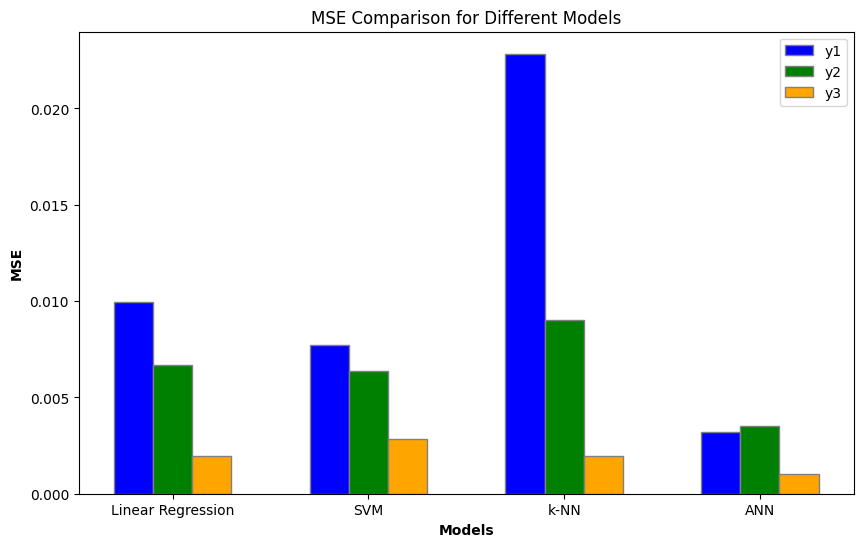

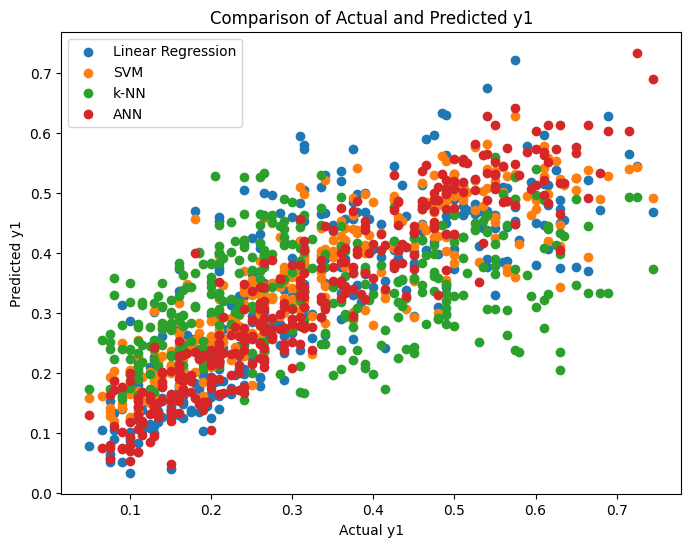

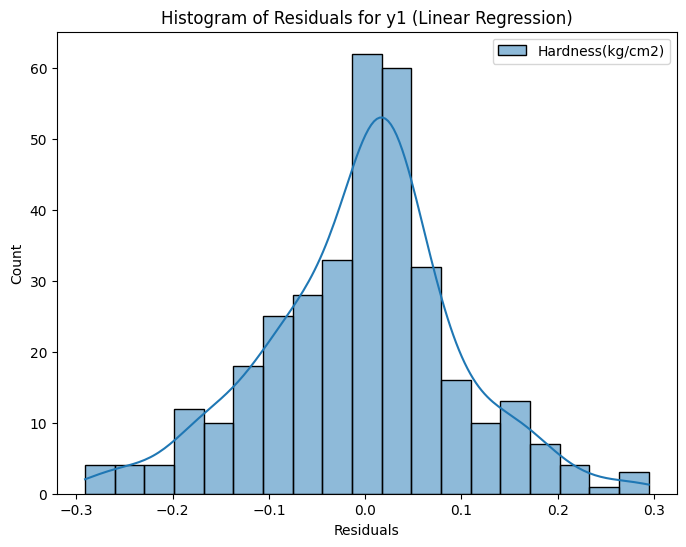

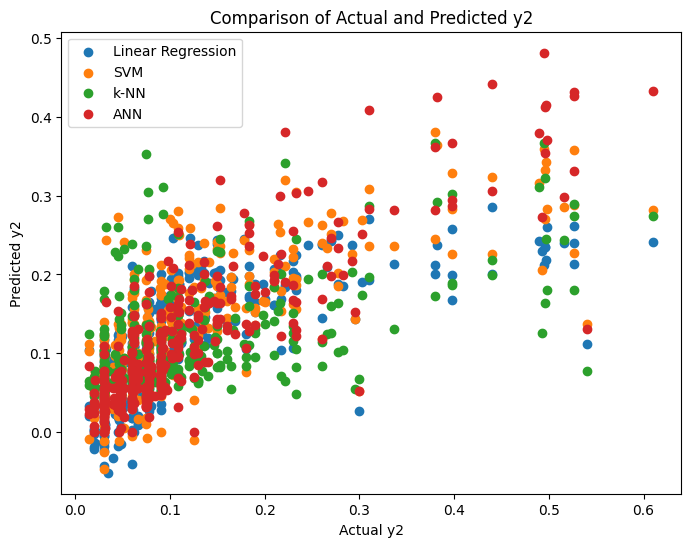

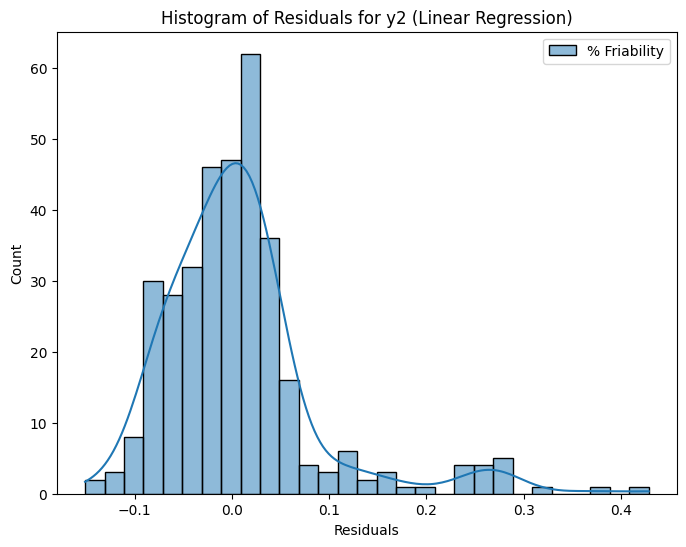

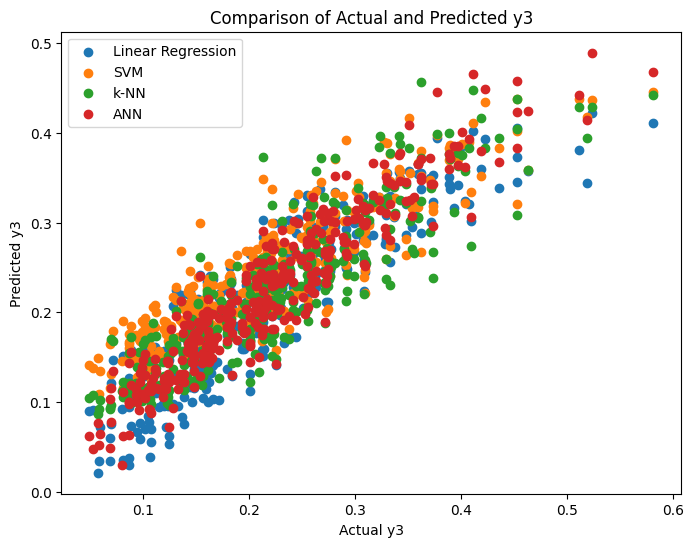

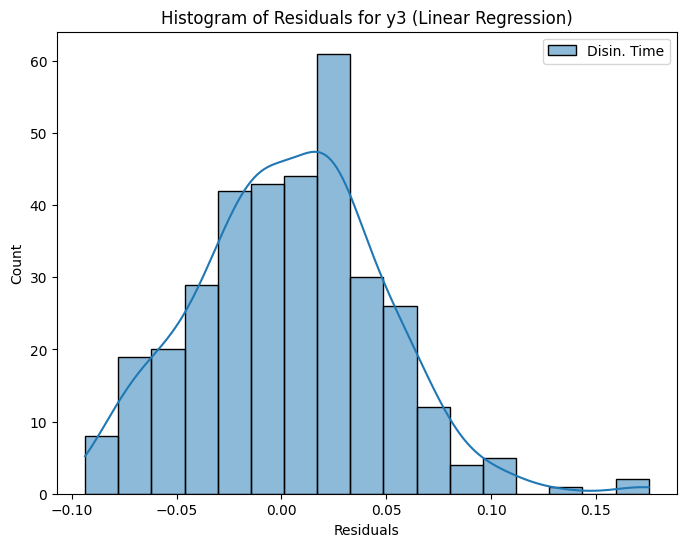

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import mean_squared_error

# Assuming you have already defined y1_test, y2_test, y3_test, y1_pred_linear, y2_pred_linear, y3_pred_linear,
# y1_pred_svm, y2_pred_svm, y3_pred_svm, y1_pred_knn, y2_pred_knn, y3_pred_knn, y1_pred_ann, y2_pred_ann, y3_pred_ann

# Evaluate Linear Regression model for y1
linear_mse_y1 = mean_squared_error(y1_test, y1_pred_linear)
print("Linear Regression MSE for y1:", linear_mse_y1)

# Evaluate Linear Regression model for y2
linear_mse_y2 = mean_squared_error(y2_test, y2_pred_linear)
print("Linear Regression MSE for y2:", linear_mse_y2)

# Evaluate Linear Regression model for y3
linear_mse_y3 = mean_squared_error(y3_test, y3_pred_linear)
print("Linear Regression MSE for y3:", linear_mse_y3)

# Evaluate Support Vector Machine (SVM) model for y1
svm_mse_y1 = mean_squared_error(y1_test, y1_pred_svm)
print("SVM MSE for y1:", svm_mse_y1)

# Evaluate Support Vector Machine (SVM) model for y2
svm_mse_y2 = mean_squared_error(y2_test, y2_pred_svm)
print("SVM MSE for y2:", svm_mse_y2)

# Evaluate Support Vector Machine (SVM) model for y3
svm_mse_y3 = mean_squared_error(y3_test, y3_pred_svm)
print("SVM MSE for y3:", svm_mse_y3)

# Evaluate k-Nearest Neighbors (k-NN) model for y1
knn_mse_y1 = mean_squared_error(y1_test, y1_pred_knn)
print("k-NN MSE for y1:", knn_mse_y1)

# Evaluate k-Nearest Neighbors (k-NN) model for y2
knn_mse_y2 = mean_squared_error(y2_test, y2_pred_knn)
print("k-NN MSE for y2:", knn_mse_y2)

# Evaluate k-Nearest Neighbors (k-NN) model for y3
knn_mse_y3 = mean_squared_error(y3_test, y3_pred_knn)
print("k-NN MSE for y3:", knn_mse_y3)

# Evaluate Artificial Neural Network (ANN) model for y1
ann_mse_y1 = mean_squared_error(y1_test, y1_pred_ann)
print("ANN MSE for y1:", ann_mse_y1)

# Evaluate Artificial Neural Network (ANN) model for y2
ann_mse_y2 = mean_squared_error(y2_test, y2_pred_ann)
print("ANN MSE for y2:", ann_mse_y2)

# Evaluate Artificial Neural Network (ANN) model for y3
ann_mse_y3 = mean_squared_error(y3_test, y3_pred_ann)
print("ANN MSE for y3:", ann_mse_y3)

# Create a bar plot of MSE values for each model
models = ['Linear Regression', 'SVM', 'k-NN', 'ANN']
mse_values_y1 = [linear_mse_y1, svm_mse_y1, knn_mse_y1, ann_mse_y1]
mse_values_y2 = [linear_mse_y2, svm_mse_y2, knn_mse_y2, ann_mse_y2]
mse_values_y3 = [linear_mse_y3, svm_mse_y3, knn_mse_y3, ann_mse_y3]

# Set width of bar
bar_width = 0.2

# Set position of bar on X axis
r1 = np.arange(len(models))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

# Create grouped bar plot for MSE values for each model for y1, y2, and y3
plt.figure(figsize=(10, 6))
plt.bar(r1, mse_values_y1, color='b', width=bar_width, edgecolor='grey', label='y1')
plt.bar(r2, mse_values_y2, color='g', width=bar_width, edgecolor='grey', label='y2')
plt.bar(r3, mse_values_y3, color='orange', width=bar_width, edgecolor='grey', label='y3')

# Add xticks on the middle of the group bars
plt.xlabel('Models', fontweight='bold')
plt.xticks([r + bar_width for r in range(len(models))], models)

# Add ylabel
plt.ylabel('MSE', fontweight='bold')

# Add title
plt.title('MSE Comparison for Different Models')
plt.legend()
plt.savefig('MSE_Comparison.tiff', dpi=600, format='tiff')
plt.show()

# Create a scatter plot to compare predicted and actual values for y1
plt.figure(figsize=(8, 6))
plt.scatter(y1_test, y1_pred_linear, label='Linear Regression')
plt.scatter(y1_test, y1_pred_svm, label='SVM')
plt.scatter(y1_test, y1_pred_knn, label='k-NN')
plt.scatter(y1_test, y1_pred_ann, label='ANN')
plt.xlabel('Actual y1')
plt.ylabel('Predicted y1')
plt.title('Comparison of Actual and Predicted y1')
plt.legend()
plt.savefig('Actual_vs_Predicted_y1.tiff', dpi=600, format='tiff')
plt.show()

# Create a histogram of residuals for y1
residuals_y1 = y1_test - y1_pred_linear
plt.figure(figsize=(8, 6))
sns.histplot(residuals_y1, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Count')
plt.title('Histogram of Residuals for y1 (Linear Regression)')
plt.savefig('Residuals_y1_Histogram.tiff', dpi=600, format='tiff')
plt.show()

# Create a scatter plot to compare predicted and actual values for y2
plt.figure(figsize=(8, 6))
plt.scatter(y2_test, y2_pred_linear, label='Linear Regression')
plt.scatter(y2_test, y2_pred_svm, label='SVM')
plt.scatter(y2_test, y2_pred_knn, label='k-NN')
plt.scatter(y2_test, y2_pred_ann, label='ANN')
plt.xlabel('Actual y2')
plt.ylabel('Predicted y2')
plt.title('Comparison of Actual and Predicted y2')
plt.legend()
plt.savefig('Actual_vs_Predicted_y2.tiff', dpi=600, format='tiff')
plt.show()

# Create a histogram of residuals for y2
residuals_y2 = y2_test - y2_pred_linear
plt.figure(figsize=(8, 6))
sns.histplot(residuals_y2, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Count')
plt.title('Histogram of Residuals for y2 (Linear Regression)')
plt.savefig('Residuals_y2_Histogram.tiff', dpi=600, format='tiff')
plt.show()

# Create a scatter plot to compare predicted and actual values for y3
plt.figure(figsize=(8, 6))
plt.scatter(y3_test, y3_pred_linear, label='Linear Regression')
plt.scatter(y3_test, y3_pred_svm, label='SVM')
plt.scatter(y3_test, y3_pred_knn, label='k-NN')
plt.scatter(y3_test, y3_pred_ann, label='ANN')
plt.xlabel('Actual y3')
plt.ylabel('Predicted y3')
plt.title('Comparison of Actual and Predicted y3')
plt.legend()
plt.savefig('Actual_vs_Predicted_y3.tiff', dpi=600, format='tiff')
plt.show()

# Create a histogram of residuals for y3
residuals_y3 = y3_test - y3_pred_linear
plt.figure(figsize=(8, 6))
sns.histplot(residuals_y3, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Count')
plt.title('Histogram of Residuals for y3 (Linear Regression)')
plt.savefig('Residuals_y3_Histogram.tiff', dpi=600, format='tiff')
plt.show()


27/27 [==============================] - 0s 9ms/step


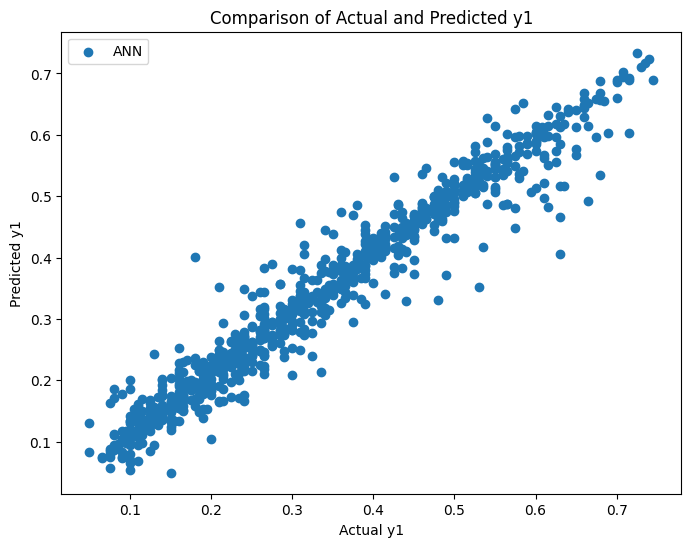

27/27 [==============================] - 1s 15ms/step


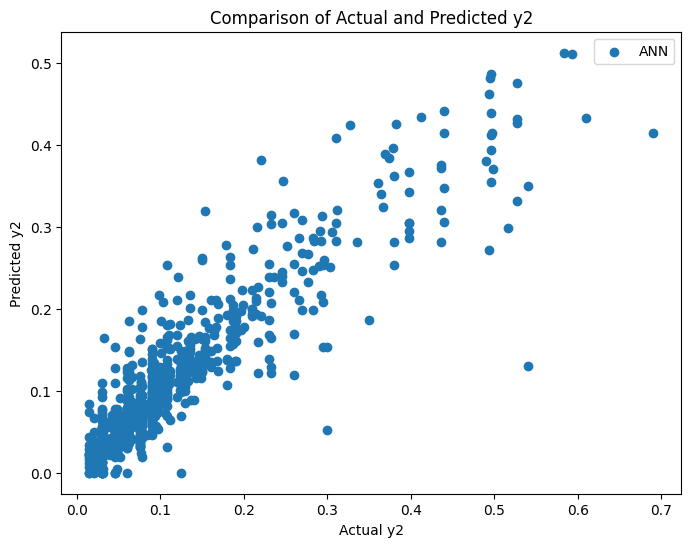

27/27 [==============================] - 0s 11ms/step


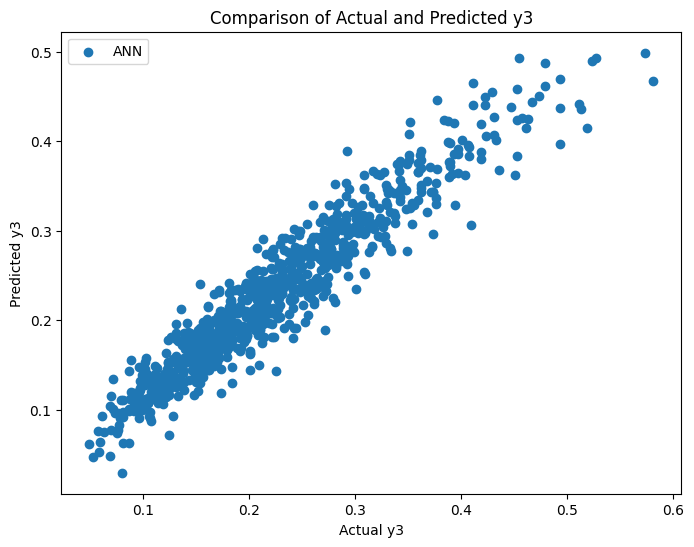

In [ ]:
y1_pred_ann_all = ann_y1.predict(X_encoded)
# Create a scatter plot to compare predicted and actual values for y3
plt.figure(figsize=(8, 6))
plt.scatter(y1, y1_pred_ann_all, label='ANN')
plt.xlabel('Actual y1')
plt.ylabel('Predicted y1')
plt.title('Comparison of Actual and Predicted y1')
plt.legend()
plt.savefig('Actual_vs_Predicted_y1_all_Data.tiff', dpi=600, format='tiff')
plt.show()


y2_pred_ann_all = ann_y2.predict(X_encoded)
# Create a scatter plot to compare predicted and actual values for y3
plt.figure(figsize=(8, 6))
plt.scatter(y2, y2_pred_ann_all, label='ANN')
plt.xlabel('Actual y2')
plt.ylabel('Predicted y2')
plt.title('Comparison of Actual and Predicted y2')
plt.legend()
plt.savefig('Actual_vs_Predicted_y2_all_Data.tiff', dpi=600, format='tiff')
plt.show()

y3_pred_ann_all = ann_y3.predict(X_encoded)
# Create a scatter plot to compare predicted and actual values for y3
plt.figure(figsize=(8, 6))
plt.scatter(y3, y3_pred_ann_all, label='ANN')
plt.xlabel('Actual y3')
plt.ylabel('Predicted y3')
plt.title('Comparison of Actual and Predicted y3')
plt.legend()
plt.savefig('Actual_vs_Predicted_y3_all_Data.tiff', dpi=600, format='tiff')
plt.show()

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import mean_squared_error

# Assuming you have already defined y1_test, y2_test, y3_test, y1_pred_linear, y2_pred_linear, y3_pred_linear,
# y1_pred_svm, y2_pred_svm, y3_pred_svm, y1_pred_knn, y2_pred_knn, y3_pred_knn, y1_pred_ann, y2_pred_ann, y3_pred_ann

# Evaluate Linear Regression model for y1
linear_mse_y1 = mean_squared_error(y1_test, y1_pred_linear)
print("Linear Regression MSE for y1:", linear_mse_y1)

# Evaluate Linear Regression model for y2
linear_mse_y2 = mean_squared_error(y2_test, y2_pred_linear)
print("Linear Regression MSE for y2:", linear_mse_y2)

# Evaluate Linear Regression model for y3
linear_mse_y3 = mean_squared_error(y3_test, y3_pred_linear)
print("Linear Regression MSE for y3:", linear_mse_y3)

# Evaluate Support Vector Machine (SVM) model for y1
svm_mse_y1 = mean_squared_error(y1_test, y1_pred_svm)
print("SVM MSE for y1:", svm_mse_y1)

# Evaluate Support Vector Machine (SVM) model for y2
svm_mse_y2 = mean_squared_error(y2_test, y2_pred_svm)
print("SVM MSE for y2:", svm_mse_y2)

# Evaluate Support Vector Machine (SVM) model for y3
svm_mse_y3 = mean_squared_error(y3_test, y3_pred_svm)
print("SVM MSE for y3:", svm_mse_y3)

# Evaluate k-Nearest Neighbors (k-NN) model for y1
knn_mse_y1 = mean_squared_error(y1_test, y1_pred_knn)
print("k-NN MSE for y1:", knn_mse_y1)

# Evaluate k-Nearest Neighbors (k-NN) model for y2
knn_mse_y2 = mean_squared_error(y2_test, y2_pred_knn)
print("k-NN MSE for y2:", knn_mse_y2)

# Evaluate k-Nearest Neighbors (k-NN) model for y3
knn_mse_y3 = mean_squared_error(y3_test, y3_pred_knn)
print("k-NN MSE for y3:", knn_mse_y3)

# Evaluate Artificial Neural Network (ANN) model for y1
ann_mse_y1 = mean_squared_error(y1_test, y1_pred_ann)
print("ANN MSE for y1:", ann_mse_y1)

# Evaluate Artificial Neural Network (ANN) model for y2
ann_mse_y2 = mean_squared_error(y2_test, y2_pred_ann)
print("ANN MSE for y2:", ann_mse_y2)

# Evaluate Artificial Neural Network (ANN) model for y3
ann_mse_y3 = mean_squared_error(y3_test, y3_pred_ann)
print("ANN MSE for y3:", ann_mse_y3)

# Function to create and save scatter plots
def create_and_save_scatter_plot(actual, predicted, model_name, y_label, file_name):
    plt.figure(figsize=(8, 6))
    plt.scatter(actual, predicted)
    plt.xlabel('Actual ' + y_label)
    plt.ylabel('Predicted ' + y_label)
    plt.title(f'Actual vs Predicted {y_label} - {model_name}')
    plt.savefig(file_name, dpi=600, format='tiff')
    plt.close()

# Create scatter plots for y1
create_and_save_scatter_plot(y1_test, y1_pred_linear, 'Linear Regression', 'y1', 'Actual_vs_Predicted_y1_LinearRegression.tiff')
create_and_save_scatter_plot(y1_test, y1_pred_svm, 'SVM', 'y1', 'Actual_vs_Predicted_y1_SVM.tiff')
create_and_save_scatter_plot(y1_test, y1_pred_knn, 'k-NN', 'y1', 'Actual_vs_Predicted_y1_kNN.tiff')
create_and_save_scatter_plot(y1_test, y1_pred_ann, 'ANN', 'y1', 'Actual_vs_Predicted_y1_ANN.tiff')

# Create scatter plots for y2
create_and_save_scatter_plot(y2_test, y2_pred_linear, 'Linear Regression', 'y2', 'Actual_vs_Predicted_y2_LinearRegression.tiff')
create_and_save_scatter_plot(y2_test, y2_pred_svm, 'SVM', 'y2', 'Actual_vs_Predicted_y2_SVM.tiff')
create_and_save_scatter_plot(y2_test, y2_pred_knn, 'k-NN', 'y2', 'Actual_vs_Predicted_y2_kNN.tiff')
create_and_save_scatter_plot(y2_test, y2_pred_ann, 'ANN', 'y2', 'Actual_vs_Predicted_y2_ANN.tiff')

# Create scatter plots for y3
create_and_save_scatter_plot(y3_test, y3_pred_linear, 'Linear Regression', 'y3', 'Actual_vs_Predicted_y3_LinearRegression.tiff')
create_and_save_scatter_plot(y3_test, y3_pred_svm, 'SVM', 'y3', 'Actual_vs_Predicted_y3_SVM.tiff')
create_and_save_scatter_plot(y3_test, y3_pred_knn, 'k-NN', 'y3', 'Actual_vs_Predicted_y3_kNN.tiff')
create_and_save_scatter_plot(y3_test, y3_pred_ann, 'ANN', 'y3', 'Actual_vs_Predicted_y3_ANN.tiff')


Linear Regression MSE for y1: 0.009935385266856948
Linear Regression MSE for y2: 0.006672579279359624
Linear Regression MSE for y3: 0.0019562261842522672
SVM MSE for y1: 0.007745382170998177
SVM MSE for y2: 0.0063570371086627935
SVM MSE for y3: 0.0028533915511101756
k-NN MSE for y1: 0.02284119514450867
k-NN MSE for y2: 0.009012113641618498
k-NN MSE for y3: 0.001961410867052023
ANN MSE for y1: 0.0031883353100411994
ANN MSE for y2: 0.003518262210847369
ANN MSE for y3: 0.0010224472920268646


In [ ]:
from sklearn.metrics import r2_score

r2_y1_ann_all = r2_score(y1, y1_pred_ann_all)
r2_y2_ann_all = r2_score(y2, y2_pred_ann_all)
r2_y3_ann_all = r2_score(y3, y3_pred_ann_all)
print('R_Square_y1 =', r2_y1_ann_all)
print('R_Square_y2 =', r2_y2_ann_all)
print('R_Square_y3 =', r2_y3_ann_all)

r2_y1_linear_all = r2_score(y1, y1_pred_linear_all)
r2_y2_ann_all = r2_score(y2, y2_pred_ann_all)
r2_y3_ann_all = r2_score(y3, y3_pred_ann_all)

R_Square_y1 = 0.9455807084118238
R_Square_y2 = 0.8235479546975933
R_Square_y3 = 0.9033105312360981


In [28]:
from sklearn.metrics import r2_score

# Calculate R-squared for Linear Regression model
linear_r2_y1 = r2_score(y1_test, y1_pred_linear)
linear_r2_y2 = r2_score(y2_test, y2_pred_linear)
linear_r2_y3 = r2_score(y3_test, y3_pred_linear)


print("Linear Regression R-squared for y1:", linear_r2_y1)
print("Linear Regression R-squared for y2:", linear_r2_y2)
print("Linear Regression R-squared for y3:", linear_r2_y3)

# Calculate R-squared for Support Vector Machine (SVM) model
svm_r2_y1 = r2_score(y1_test, y1_pred_svm)
svm_r2_y2 = r2_score(y2_test, y2_pred_svm)
svm_r2_y3 = r2_score(y3_test, y3_pred_svm)

print("SVM R-squared for y1:", svm_r2_y1)
print("SVM R-squared for y2:", svm_r2_y2)
print("SVM R-squared for y3:", svm_r2_y3)

# Calculate R-squared for k-Nearest Neighbors (k-NN) model
knn_r2_y1 = r2_score(y1_test, y1_pred_knn)
knn_r2_y2 = r2_score(y2_test, y2_pred_knn)
knn_r2_y3 = r2_score(y3_test, y3_pred_knn)

print("k-NN R-squared for y1:", knn_r2_y1)
print("k-NN R-squared for y2:", knn_r2_y2)
print("k-NN R-squared for y3:", knn_r2_y3)

# Calculate R-squared for Artificial Neural Network (ANN) model
ann_r2_y1 = r2_score(y1_test, y1_pred_ann)
ann_r2_y2 = r2_score(y2_test, y2_pred_ann)
ann_r2_y3 = r2_score(y3_test, y3_pred_ann)

print("ANN R-squared for y1:", ann_r2_y1)
print("ANN R-squared for y2:", ann_r2_y2)
print("ANN R-squared for y3:", ann_r2_y3)


Linear Regression R-squared for y1: 0.6270934660196503
Linear Regression R-squared for y2: 0.4612428275592396
Linear Regression R-squared for y3: 0.7849339126127237
SVM R-squared for y1: 0.7092912310733333
SVM R-squared for y2: 0.4867203229254331
SVM R-squared for y3: 0.6863002031047137
k-NN R-squared for y1: 0.14269747125749188
k-NN R-squared for y2: 0.2723442225269206
k-NN R-squared for y3: 0.7843639123473842
ANN R-squared for y1: 0.8803316592461894
ANN R-squared for y2: 0.7159285905399959
ANN R-squared for y3: 0.8875928865352631


In [31]:
from sklearn.metrics import r2_score

# Predict using the full dataset
y1_pred_linear_full = linear_reg_y1.predict(X_encoded)
y2_pred_linear_full = linear_reg_y2.predict(X_encoded)
y3_pred_linear_full = linear_reg_y3.predict(X_encoded)

y1_pred_svm_full = svm_y1.predict(X_encoded)
y2_pred_svm_full = svm_y2.predict(X_encoded)
y3_pred_svm_full = svm_y3.predict(X_encoded)

y1_pred_knn_full = knn_y1.predict(X_encoded)
y2_pred_knn_full = knn_y2.predict(X_encoded)
y3_pred_knn_full = knn_y3.predict(X_encoded)

y1_pred_ann_full = ann_y1.predict(X_encoded).ravel()
y2_pred_ann_full = ann_y2.predict(X_encoded).ravel()
y3_pred_ann_full = ann_y3.predict(X_encoded).ravel()

# Calculate R-squared for Linear Regression model
linear_r2_y1 = r2_score(y1, y1_pred_linear_full)
linear_r2_y2 = r2_score(y2, y2_pred_linear_full)
linear_r2_y3 = r2_score(y3, y3_pred_linear_full)

print("Linear Regression R-squared for y1:", linear_r2_y1)
print("Linear Regression R-squared for y2:", linear_r2_y2)
print("Linear Regression R-squared for y3:", linear_r2_y3)

# Calculate R-squared for Support Vector Machine (SVM) model
svm_r2_y1 = r2_score(y1, y1_pred_svm_full)
svm_r2_y2 = r2_score(y2, y2_pred_svm_full)
svm_r2_y3 = r2_score(y3, y3_pred_svm_full)

print("SVM R-squared for y1:", svm_r2_y1)
print("SVM R-squared for y2:", svm_r2_y2)
print("SVM R-squared for y3:", svm_r2_y3)

# Calculate R-squared for k-Nearest Neighbors (k-NN) model
knn_r2_y1 = r2_score(y1, y1_pred_knn_full)
knn_r2_y2 = r2_score(y2, y2_pred_knn_full)
knn_r2_y3 = r2_score(y3, y3_pred_knn_full)

print("k-NN R-squared for y1:", knn_r2_y1)
print("k-NN R-squared for y2:", knn_r2_y2)
print("k-NN R-squared for y3:", knn_r2_y3)

# Calculate R-squared for Artificial Neural Network (ANN) model
ann_r2_y1 = r2_score(y1, y1_pred_ann_full)
ann_r2_y2 = r2_score(y2, y2_pred_ann_full)
ann_r2_y3 = r2_score(y3, y3_pred_ann_full)

print("ANN R-squared for y1:", ann_r2_y1)
print("ANN R-squared for y2:", ann_r2_y2)
print("ANN R-squared for y3:", ann_r2_y3)


27/27 [==============================] - 0s 11ms/step
Linear Regression R-squared for y1: 0.6536254976785207
Linear Regression R-squared for y2: 0.4580133918836433
Linear Regression R-squared for y3: 0.7745794632691108
SVM R-squared for y1: 0.7404843441371762
SVM R-squared for y2: 0.5279376102666009
SVM R-squared for y3: 0.6682513620700105
k-NN R-squared for y1: 0.31361474549762847
k-NN R-squared for y2: 0.4039781592640568
k-NN R-squared for y3: 0.8212125426525136
ANN R-squared for y1: 0.9455807084118238
ANN R-squared for y2: 0.8235479546975933
ANN R-squared for y3: 0.9033105312360981


**FIND IMPORTANCE OF INDEPENDENT FACTORS**

In [26]:
# Feature importances for y1
y1_feature_importances = np.abs(linear_reg_y1.coef_)
y1_feature_names = X_encoded.columns
y1_feature_importance_df = pd.DataFrame({'Feature': y1_feature_names, 'Importance': y1_feature_importances})
y1_feature_importance_df = y1_feature_importance_df.sort_values(by='Importance', ascending=False)

# Feature importances for y2
y2_feature_importances = np.abs(linear_reg_y2.coef_)
y2_feature_names = X_encoded.columns
y2_feature_importance_df = pd.DataFrame({'Feature': y2_feature_names, 'Importance': y2_feature_importances})
y2_feature_importance_df = y2_feature_importance_df.sort_values(by='Importance', ascending=False)

# Feature importances for y3
y3_feature_importances = np.abs(linear_reg_y3.coef_)
y3_feature_names = X_encoded.columns
y3_feature_importance_df = pd.DataFrame({'Feature': y3_feature_names, 'Importance': y3_feature_importances})
y3_feature_importance_df = y3_feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the feature importances for y1, y2, and y3
print("Feature Importances for y1:")
print(y1_feature_importance_df)
print("\nFeature Importances for y2:")
print(y2_feature_importance_df)
print("\nFeature Importances for y3:")
print(y3_feature_importance_df)


ValueError: Per-column arrays must each be 1-dimensional

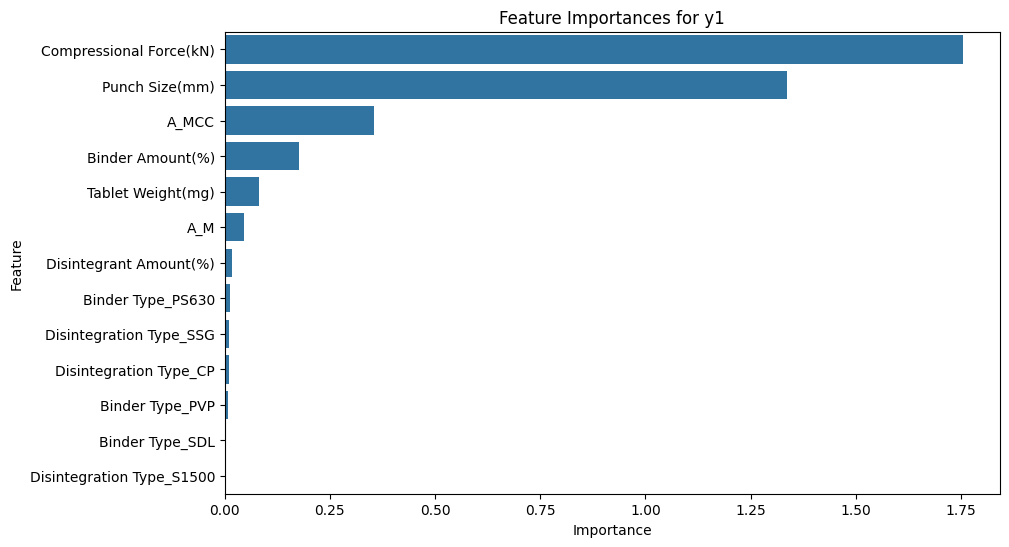

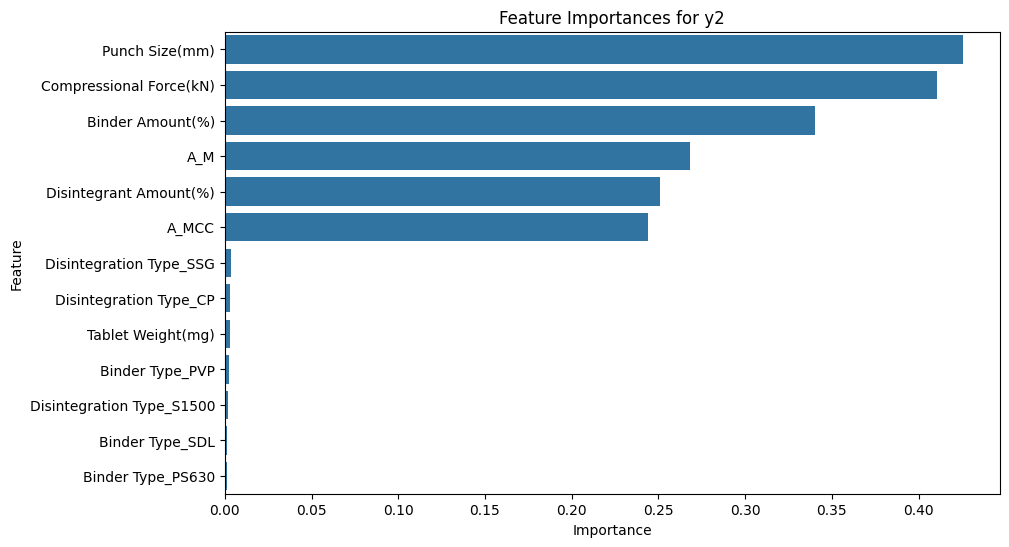

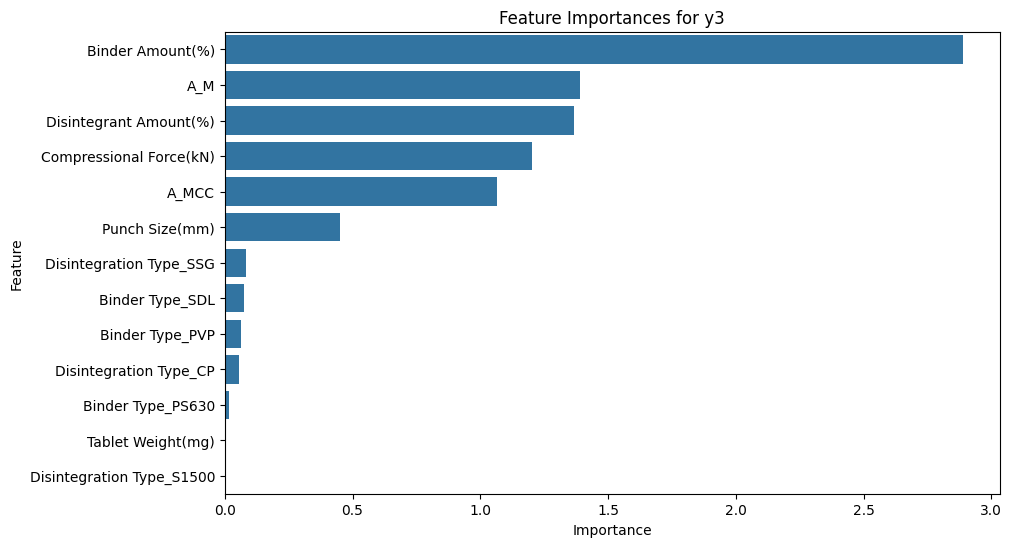

In [ ]:
# Import necessary libraries for visualization
import seaborn as sns

# Set the figure size for better visibility
plt.figure(figsize=(10, 6))

# Plot the feature importances for y1
sns.barplot(x='Importance', y='Feature', data=y1_feature_importance_df)
plt.title('Feature Importances for y1')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.savefig('Importance_y1.tiff', dpi=600, format='tiff')
plt.show()

# Set the figure size for better visibility
plt.figure(figsize=(10, 6))

# Plot the feature importances for y2
sns.barplot(x='Importance', y='Feature', data=y2_feature_importance_df)
plt.title('Feature Importances for y2')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.savefig('Importance_y2.tiff', dpi=600, format='tiff')
plt.show()

# Set the figure size for better visibility
plt.figure(figsize=(10, 6))

# Plot the feature importances for y3
sns.barplot(x='Importance', y='Feature', data=y3_feature_importance_df)
plt.title('Feature Importances for y3')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.savefig('Importance_y3.tiff', dpi=600, format='tiff')
plt.show()


Feature Importances for y1:


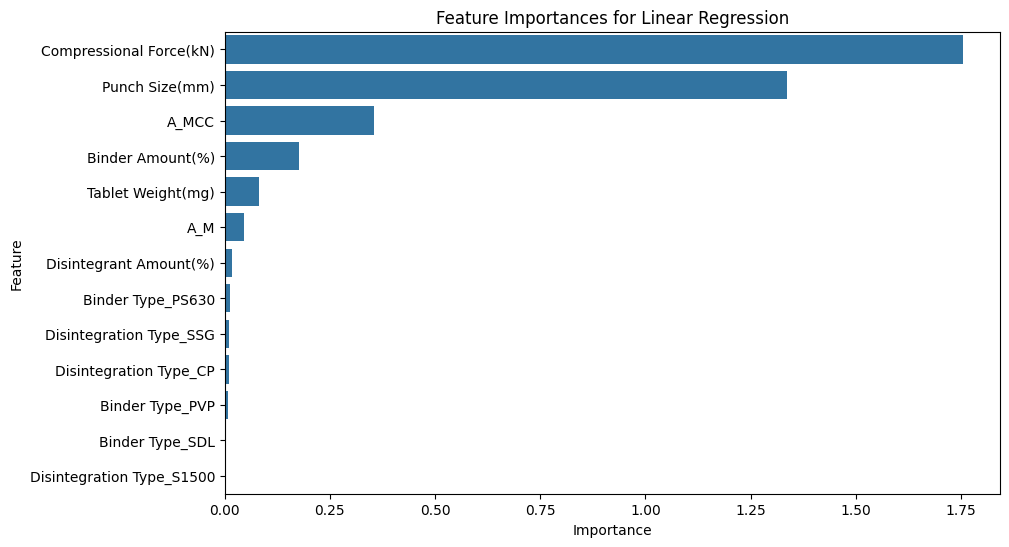

Feature importances are not available for Support Vector Machine.
Feature importances are not available for k-Nearest Neighbors.
Feature importances are not available for Artificial Neural Network.
Feature Importances for y2:


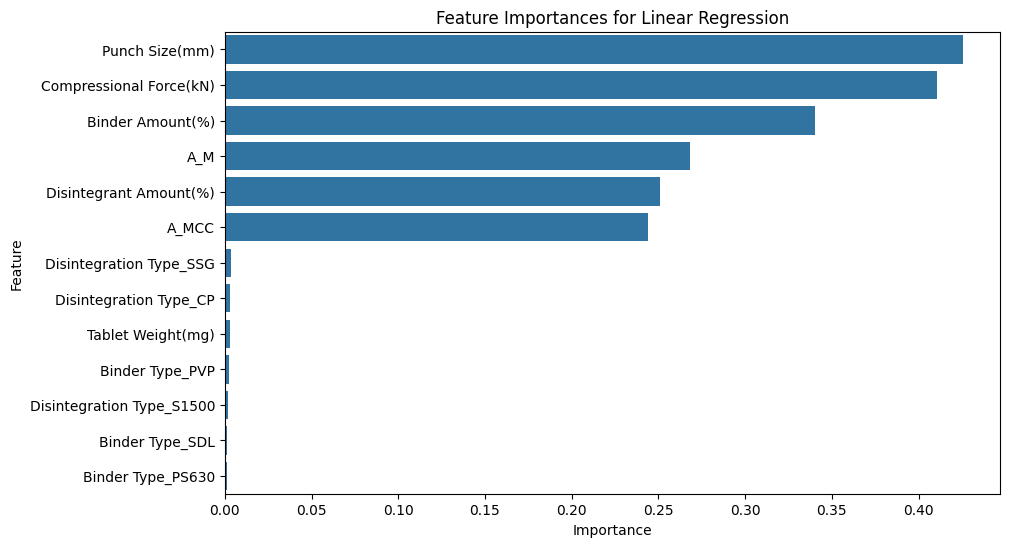

Feature importances are not available for Support Vector Machine.
Feature importances are not available for k-Nearest Neighbors.
Feature importances are not available for Artificial Neural Network.
Feature Importances for y3:


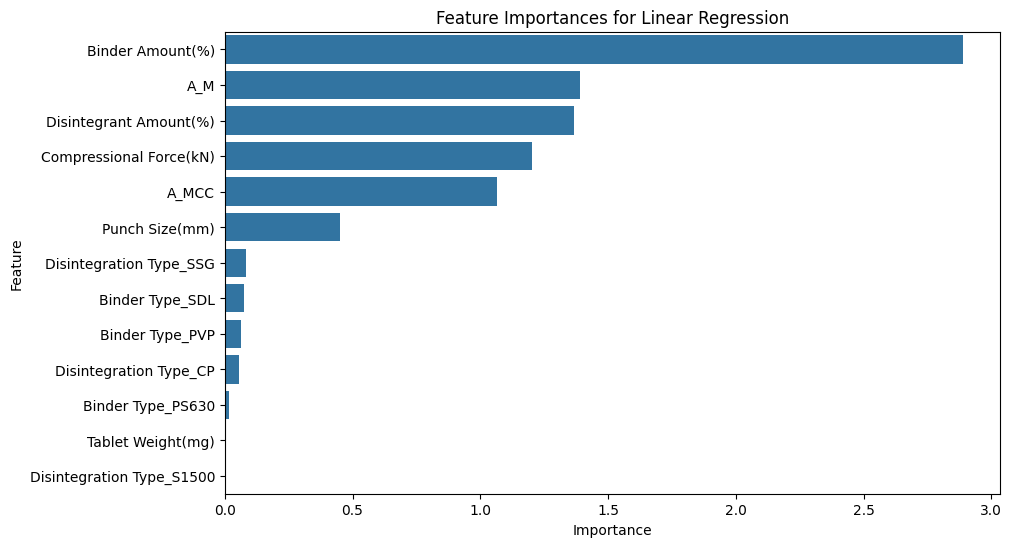

Feature importances are not available for Support Vector Machine.
Feature importances are not available for k-Nearest Neighbors.
Feature importances are not available for Artificial Neural Network.


In [ ]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder

# ... (previous code to load and preprocess the data)

# Function to calculate and visualize feature importances
def calculate_and_visualize_feature_importances(model, model_name, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)

    # Calculate feature importances for Linear Regression model
    if isinstance(model, LinearRegression):
        feature_importances = np.abs(model.coef_)
    # Calculate feature importances for SVM, k-NN, and ANN models
    else:
        feature_importances = None

    if feature_importances is not None:
        feature_names = X_train.columns
        feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
        feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

        # Visualization of feature importances
        plt.figure(figsize=(10, 6))
        sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
        plt.title(f'Feature Importances for {model_name}')
        plt.xlabel('Importance')
        plt.ylabel('Feature')
        plt.show()
    else:
        print(f"Feature importances are not available for {model_name}.")

# Models for y1, y2, and y3
models_y1 = [
    LinearRegression(),
    SVR(),
    KNeighborsRegressor(),
    MLPRegressor()
]

models_y2 = [
    LinearRegression(),
    SVR(),
    KNeighborsRegressor(),
    MLPRegressor()
]

models_y3 = [
    LinearRegression(),
    SVR(),
    KNeighborsRegressor(),
    MLPRegressor()
]

model_names = ['Linear Regression', 'Support Vector Machine', 'k-Nearest Neighbors', 'Artificial Neural Network']

# Loop through all models and visualize feature importances for y1
print("Feature Importances for y1:")
for model, model_name in zip(models_y1, model_names):
    calculate_and_visualize_feature_importances(model, model_name, X_train, X_test, y1_train, y1_test)

# Loop through all models and visualize feature importances for y2
print("Feature Importances for y2:")
for model, model_name in zip(models_y2, model_names):
    calculate_and_visualize_feature_importances(model, model_name, X_train, X_test, y2_train, y2_test)

# Loop through all models and visualize feature importances for y3
print("Feature Importances for y3:")
for model, model_name in zip(models_y3, model_names):
    calculate_and_visualize_feature_importances(model, model_name, X_train, X_test, y3_train, y3_test)


In [ ]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
import shap

# ... (previous code to load and preprocess the data)

# Function to calculate and visualize feature importances
def calculate_and_visualize_feature_importances(model, model_name, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)

    # Calculate feature importances for Linear Regression model
    if isinstance(model, LinearRegression):
        feature_importances = np.abs(model.coef_)
        feature_names = X_train.columns
    # Calculate feature importances for SVM and k-NN using permutation feature importance
    elif isinstance(model, (SVR, KNeighborsRegressor)):
        feature_importances = permutation_feature_importance(model, X_test, y_test, mean_squared_error)
        feature_names = X_train.columns
    # Calculate feature importances for ANN using SHAP values
    else:
        explainer = shap.DeepExplainer(model, X_train)
        shap_values = explainer.shap_values(X_test)
        feature_importances = np.abs(shap_values).mean(axis=0)
        feature_names = X_train.columns

    feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

    # Visualization of feature importances
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
    plt.title(f'Feature Importances for {model_name}')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.show()

# Function to calculate permutation feature importance
def permutation_feature_importance(model, X, y, metric):
    baseline = metric(y, model.predict(X))
    imp = []
    for col in X.columns:
        save = X[col].copy()
        X[col] = np.random.permutation(X[col])
        m = metric(y, model.predict(X))
        X[col] = save
        imp.append(baseline - m)
    return np.array(imp)

# Splitting the dataset into features (X) and targets (y)
X = df.iloc[:, 0:9]  # Adjust the column indices as per your dataset
X1 = X.iloc[:, 0:2]
X2 = X.iloc[:, 2:8].apply(pd.to_numeric, errors='coerce') / 100
X3 = X.iloc[:,8:9].apply(pd.to_numeric, errors='coerce') / 1000

y1 = df.iloc[:, -3].apply(pd.to_numeric, errors='coerce') / 100  # Output column 1 = Hardness(kg/cm2)
y2 = df.iloc[:, -2].apply(pd.to_numeric, errors='coerce') / 100  # Output column 2 = % Friability
y3 = df.iloc[:, -1].apply(pd.to_numeric, errors='coerce') / 1000  # Output column 3 = Disin. Time

# Perform one-hot encoding on X1
onehot_encoder = OneHotEncoder(sparse=False, drop='first')
X1_encoded = onehot_encoder.fit_transform(X1)

# Create a DataFrame with the encoded columns
X1_encoded_df = pd.DataFrame(X1_encoded, columns=onehot_encoder.get_feature_names_out(X1.columns))

# Concatenate the encoded columns with the remaining columns in X
X_encoded = pd.concat([X1_encoded_df, X2,X3], axis=1)

# Splitting the data into training and testing sets
X_train, X_test, y1_train, y1_test, y2_train, y2_test, y3_train, y3_test = train_test_split(X_encoded, y1, y2, y3, test_size=0.4, random_state=42)

# Models for y1, y2, and y3
models_y1 = [
    LinearRegression(),
    SVR(),
    KNeighborsRegressor(),
    MLPRegressor()
]

models_y2 = [
    LinearRegression(),
    SVR(),
    KNeighborsRegressor(),
    MLPRegressor()
]

models_y3 = [
    LinearRegression(),
    SVR(),
    KNeighborsRegressor(),
    MLPRegressor()
]

model_names = ['Linear Regression', 'Support Vector Machine', 'k-Nearest Neighbors', 'Artificial Neural Network']

# Loop through all models and visualize feature importances


ModuleNotFoundError: No module named 'shap'

In [ ]:
import shap

# Wrap the ANN model in a function to make it callable by SHAP
def ann_predict(input_data):
    return ann_y3.predict(input_data)

# Create an explainer object for the ANN model
explainer = shap.Explainer(ann_predict, X_train)

# Calculate SHAP values for the test set
shap_values = explainer.shap_values(X_test)

# Summary plot for feature importances
shap.summary_plot(shap_values, X_test, plot_type="bar", feature_names=X_encoded.columns)

# Summary plot for individual feature impact on y3 output
shap.summary_plot(shap_values, X_test, feature_names=X_encoded.columns)


In [ ]:
from google.colab import files

# Replace 'file_path' with the path to the file you want to download
files.download('/content/drive/My Drive/y1.hdf5')
files.download('/content/drive/My Drive/y2.hdf5')
files.download('/content/drive/My Drive/y3.hdf5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>